# Decision Tree Classifier for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts and 151 samples labeled in the semi-supervised learning task. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the decision tree algorithm.

In [1]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree.export import export_text
from sklearn.feature_selection import SelectFromModel, SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif
from XLB import *

import warnings
warnings.filterwarnings('ignore')

d:\program files\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


Here we load the data from the csv file and preprocess it by removing the header row and the filename column

After the initial preprocessing step, we separated the music features and the labelled emotion into the x_train and y_train arrays respectively

In [2]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# WINNER: 47.62% 0.45
feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 45) (750,)
(750, 45) (750,)


In [3]:
#MOVING FEATURE HEADERS INTO A LIST
import csv

with open("FinalTrainingSet.csv") as f:
    reader = csv.reader(f)
    features = next(reader)

#Deleting everything except features from the dataset
features.remove("Row Labels")
features.remove("Theme")
features.remove("Theme(Numbered)")
print(len(features))
#Retained features after selection
selected_feats = feat_sel_2.get_support(True)

for ind, ft in sorted(enumerate(features), reverse=True): 
    if ind not in selected_feats:
        del features[ind]
  
#Printing modified list 
#print (features) 
#print (len(features))

324


In [4]:
themes = ["Calm","Cheerful","Bravery","Fearful","Love","Sadness"]
ovr_train = []
ovr_val = []
ovr_y_smote = []
ovr_y_os = []
for i in range(1,7):
    ovr_train.append(ovr_labels(y_train, i))
    ovr_val.append(ovr_labels(y_val,i))
    ovr_y_os.append(ovr_labels(y_os,i))
    ovr_y_smote.append(ovr_labels(y_smote,i))    

Here we perform different methods to deal with imbalanced datasets. We used the oversampling *Insert link to oversampling if needed* and SMOTE methodology *Insert link to SMOTE if needed*

Here we defined a function that will train the model and perform the hyperparameter search. x_train is the input data, y_train is the labels for the input data, and hp_search is the algorithm for hyperparameter search

This function trains the model, using the previously defined train_model function, and displays the confusion matrix of the model. 

The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the decison tree object and the hyperparameter search object.

In [5]:
# Decision Tree
random_search_iterations = 1000
n_splits = 5
rand_seed = 481516234

parameters = {
    'criterion':["gini", "entropy"], 
    'splitter':["best", "random"], 
    'max_depth':range(1, num_features + 1), 
    'min_samples_split': uniform(loc=0.00,scale=1.0),
    'min_samples_leaf': uniform(loc=0.0001,scale=0.4999)
}

# train classifier for SMOTE data
dt = tree.DecisionTreeClassifier(random_state=rand_seed)
rscv = RandomizedSearchCV(dt, parameters,cv=n_splits, random_state=rand_seed, n_iter=random_search_iterations,n_jobs=-1)

This model is trained using the default 

Best Score: 0.8628
Vanilla Train Accuracy: 86.2843%


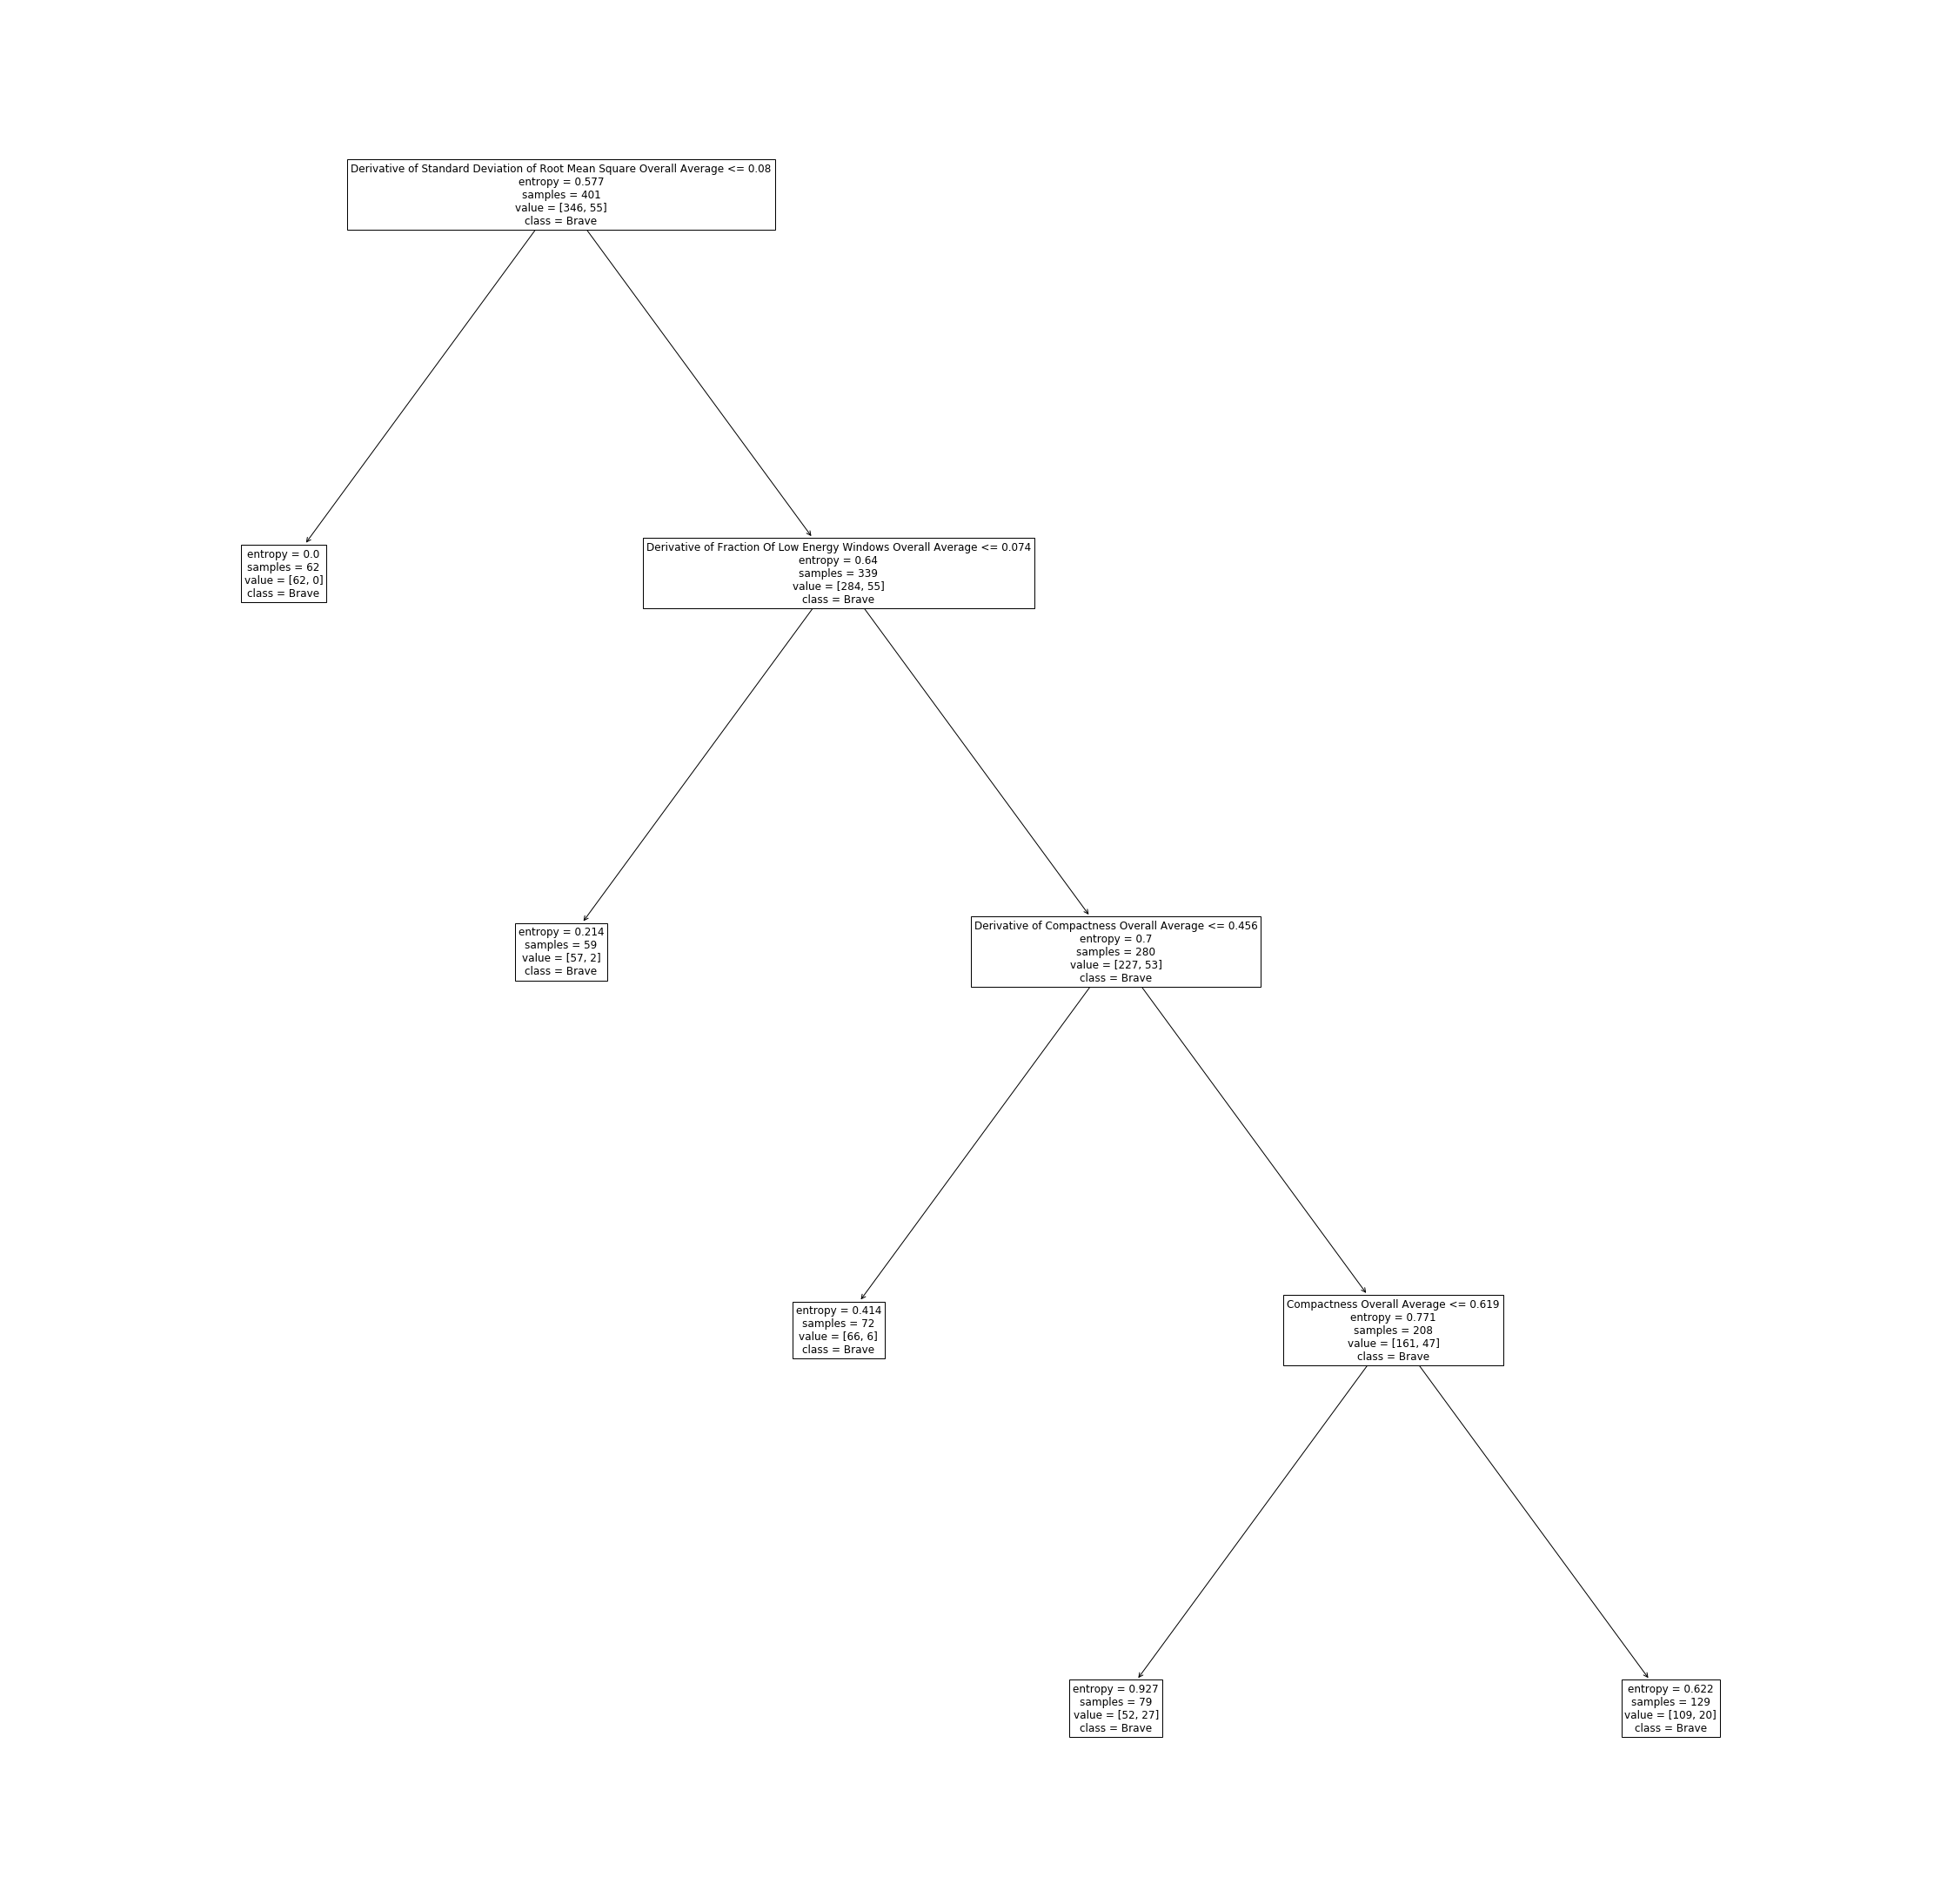

|--- Derivative of Running Mean of Method of Moments Overall Average <= 0.08
|   |--- class: 0
|--- Derivative of Running Mean of Method of Moments Overall Average >  0.08
|   |--- Derivative of Standard Deviation of Spectral Variability Overall Standard Deviation <= 0.07
|   |   |--- class: 0
|   |--- Derivative of Standard Deviation of Spectral Variability Overall Standard Deviation >  0.07
|   |   |--- Derivative of Standard Deviation of Spectral Flux Overall Average <= 0.46
|   |   |   |--- class: 0
|   |   |--- Derivative of Standard Deviation of Spectral Flux Overall Average >  0.46
|   |   |   |--- Derivative of Running Mean of Zero Crossings Overall Average <= 0.62
|   |   |   |   |--- class: 0
|   |   |   |--- Derivative of Running Mean of Zero Crossings Overall Average >  0.62
|   |   |   |   |--- class: 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79


(85.71428571428571, 0.7912087912087911)

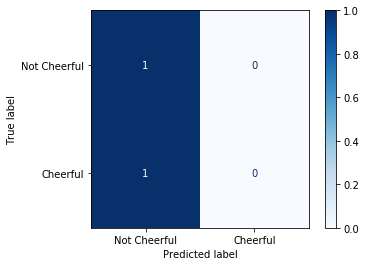

In [6]:
i = 1
print_res("Vanilla",x_train,ovr_train[i],rscv, themes[i], verbose = False)
disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
disp_tree_text(rscv.best_estimator_, features)    
test_res("Vanilla",x_val,ovr_val[i],rscv, themes[i])


In [7]:
tree_text = tree_to_text(rscv.best_estimator_, features)
rules = extract_rules(tree_text)
rules = transform_rules(rules)
print(rules)

{'0': ['Derivative_of_Running_Mean_of_Method_of_Moments_Overall_Average <= 0.08', 'class: 0'], '1': ['Derivative_of_Running_Mean_of_Method_of_Moments_Overall_Average > 0.08', 'Derivative_of_Standard_Deviation_of_Spectral_Variability_Overall_Standard_Deviation <= 0.07', 'class: 0'], '2': ['Derivative_of_Standard_Deviation_of_Spectral_Variability_Overall_Standard_Deviation > 0.07', 'Derivative_of_Standard_Deviation_of_Spectral_Flux_Overall_Average <= 0.46', 'class: 0'], '3': ['Derivative_of_Standard_Deviation_of_Spectral_Flux_Overall_Average > 0.46', 'Derivative_of_Running_Mean_of_Zero_Crossings_Overall_Average <= 0.62', 'class: 0'], '4': ['Derivative_of_Running_Mean_of_Zero_Crossings_Overall_Average > 0.62', 'class: 0']}


In [13]:
dataset = pd.read_csv("FinalTrainingSet.csv")
cols = dataset.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, "unicode")) else x)
col = cols.tolist()
col[-1] = 'Themes'
dataset.columns = col
for i in rules:
    rule = rules[i]
    query = build_query(rule)
    x = dataset.query(query)
    print(x.shape[0])

0
276
0
0
3


Best Score: 0.8427
Random Oversampling Train Accuracy: 84.4000%


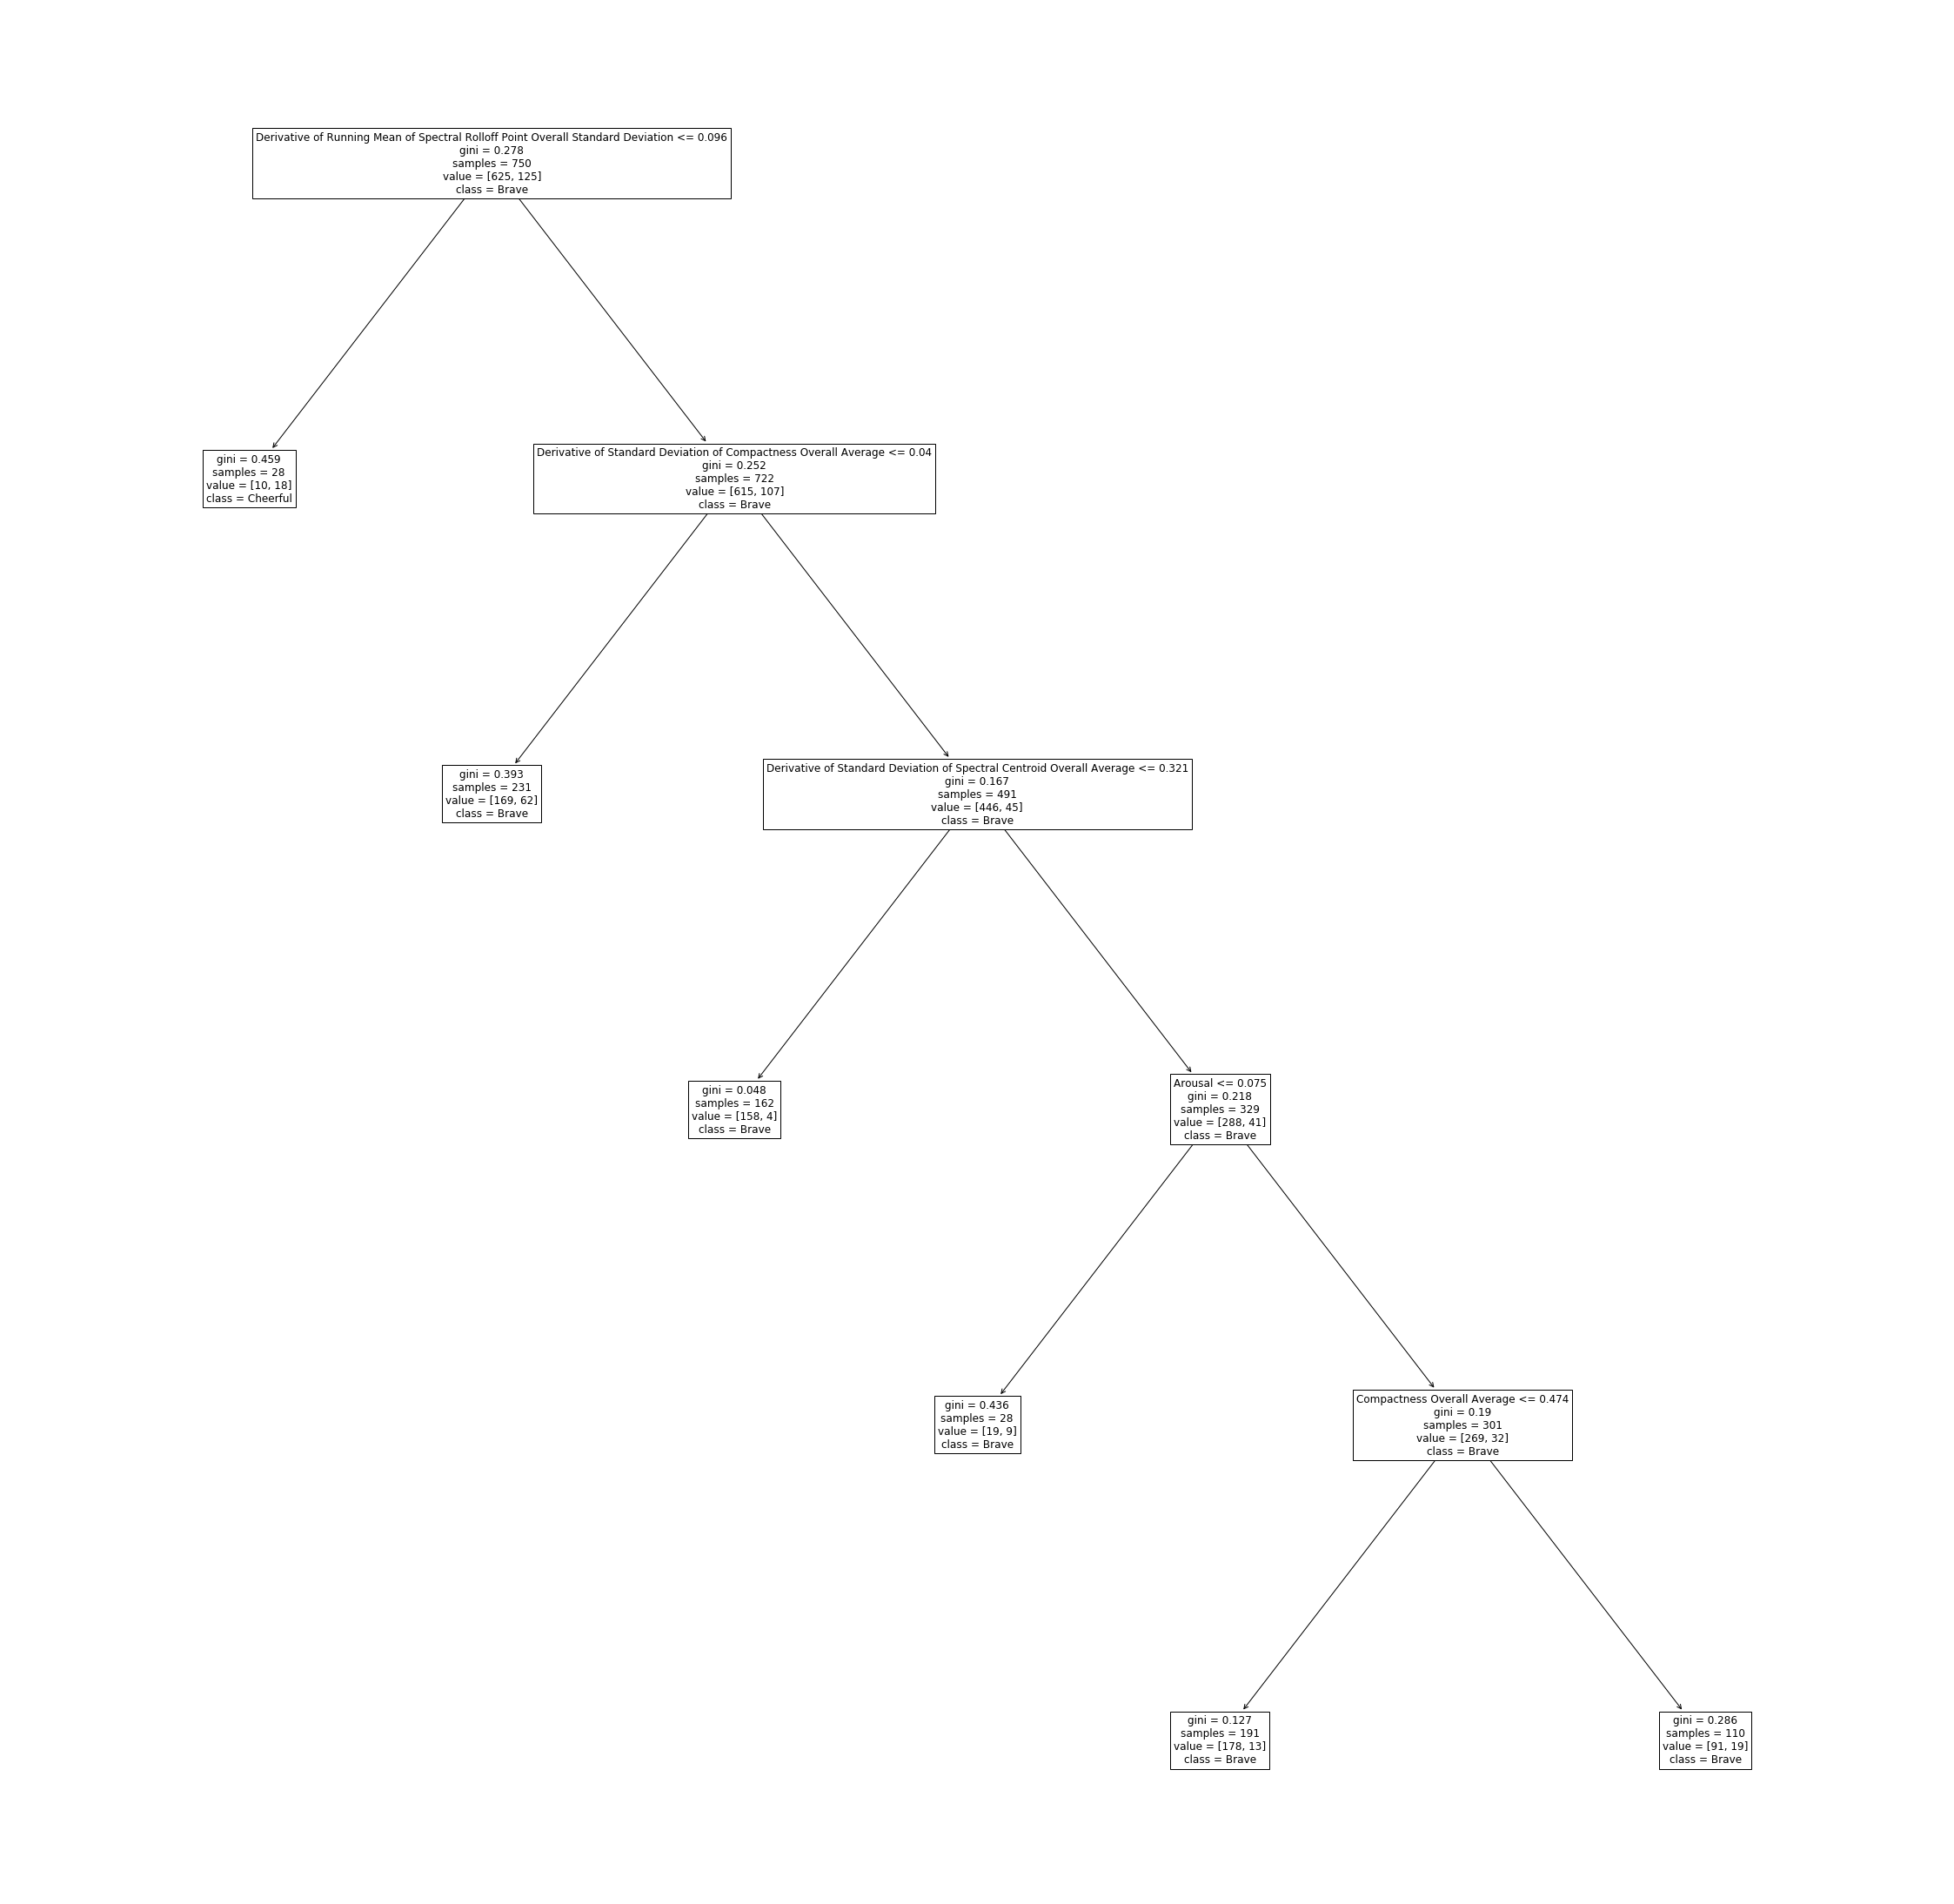

|--- Standard Deviation of Spectral Rolloff Point Overall Average <= 0.10
|   |--- class: 1
|--- Standard Deviation of Spectral Rolloff Point Overall Average >  0.10
|   |--- Derivative of Running Mean of Beat Sum Overall Average <= 0.04
|   |   |--- class: 0
|   |--- Derivative of Running Mean of Beat Sum Overall Average >  0.04
|   |   |--- Derivative of Running Mean of Partial Based Spectral Centroid Overall Average <= 0.32
|   |   |   |--- class: 0
|   |   |--- Derivative of Running Mean of Partial Based Spectral Centroid Overall Average >  0.32
|   |   |   |--- Derivative of Running Mean of Root Mean Square Overall Standard Deviation <= 0.08
|   |   |   |   |--- class: 0
|   |   |   |--- Derivative of Running Mean of Root Mean Square Overall Standard Deviation >  0.08
|   |   |   |   |--- Derivative of Spectral Centroid Overall Standard Deviation <= 0.47
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Derivative of Spectral Centroid Overall Standard Deviation >  0.47
|   | 

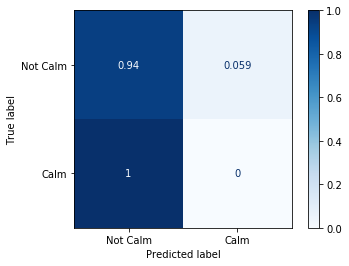

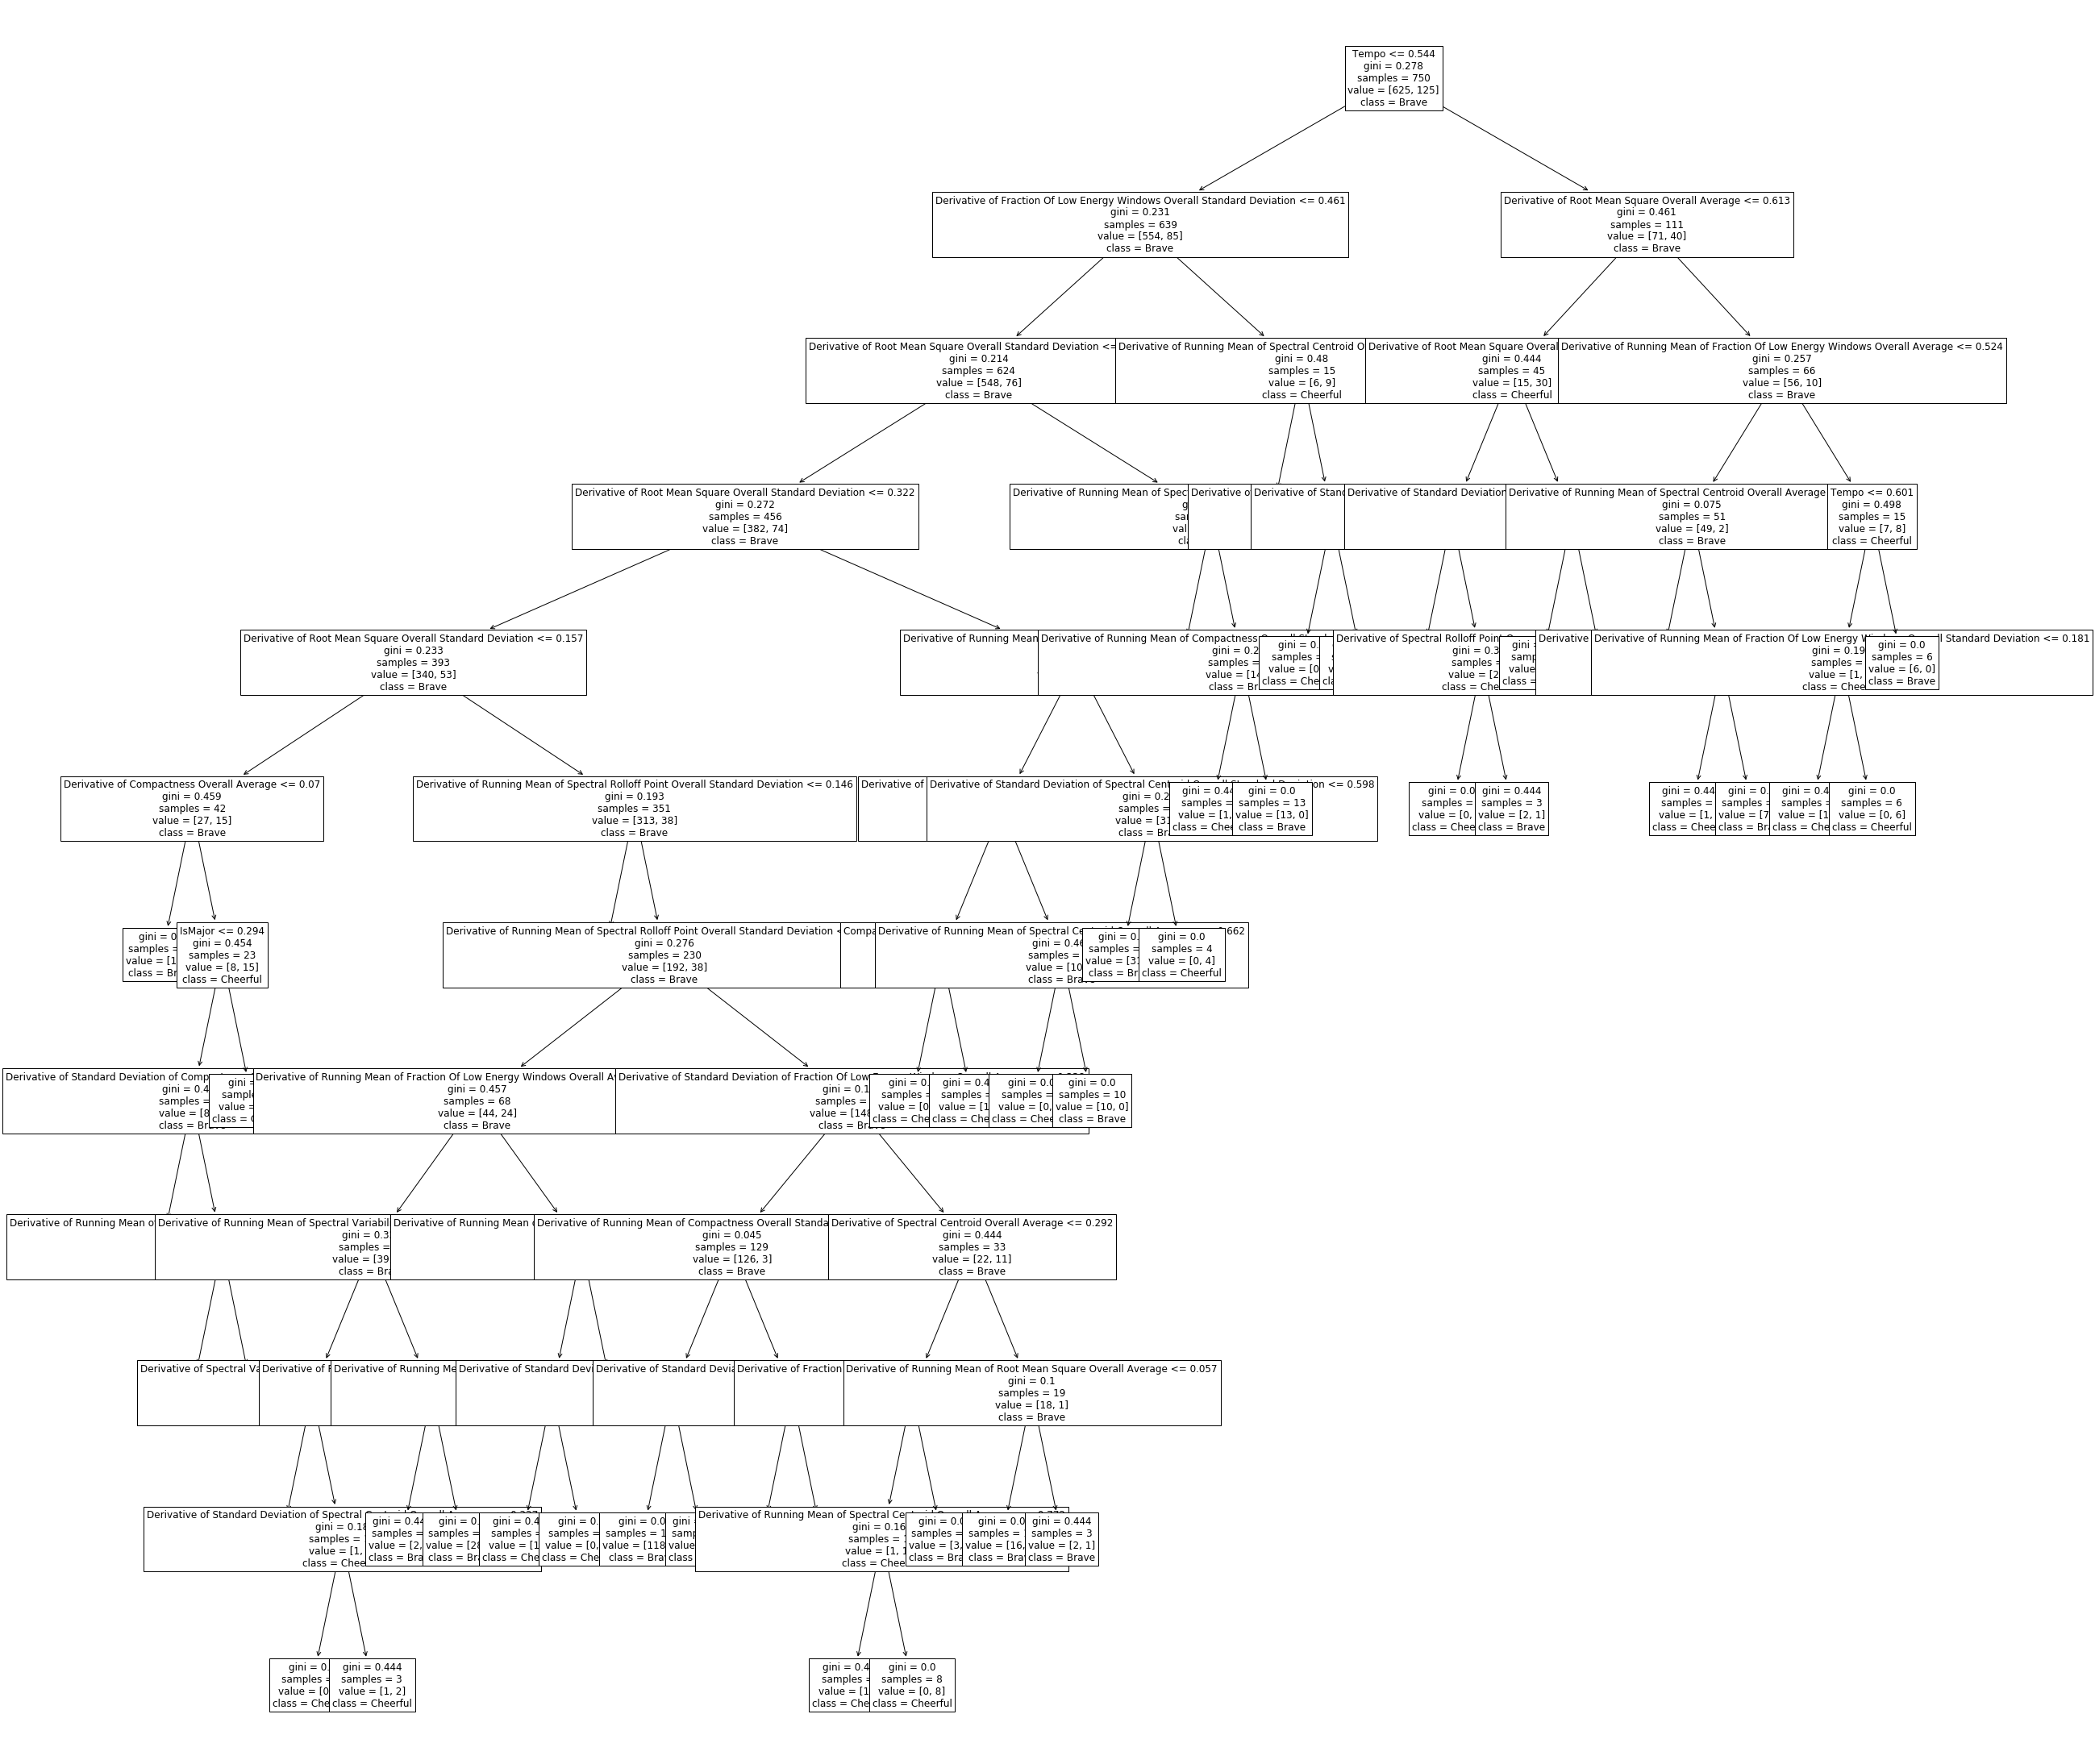

|--- Derivative of Running Mean of Fraction Of Low Energy Windows Overall Average <= 0.54
|   |--- Derivative of Standard Deviation of Spectral Variability Overall Standard Deviation <= 0.46
|   |   |--- Fraction Of Low Energy Windows Overall Average <= 0.36
|   |   |   |--- Fraction Of Low Energy Windows Overall Average <= 0.32
|   |   |   |   |--- Fraction Of Low Energy Windows Overall Average <= 0.16
|   |   |   |   |   |--- Derivative of Standard Deviation of Root Mean Square Overall Standard Deviation <= 0.07
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Derivative of Standard Deviation of Root Mean Square Overall Standard Deviation >  0.07
|   |   |   |   |   |   |--- Derivative of Running Mean of Spectral Variability Overall Average <= 0.29
|   |   |   |   |   |   |   |--- Derivative of Running Mean of Beat Sum Overall Average <= 0.18
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Derivative of Running Mean of Beat Sum Overall Ave

Best Score: 0.9040
Random Oversampling Train Accuracy: 97.4667%


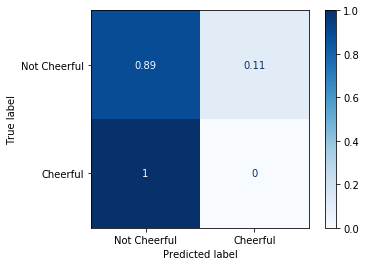

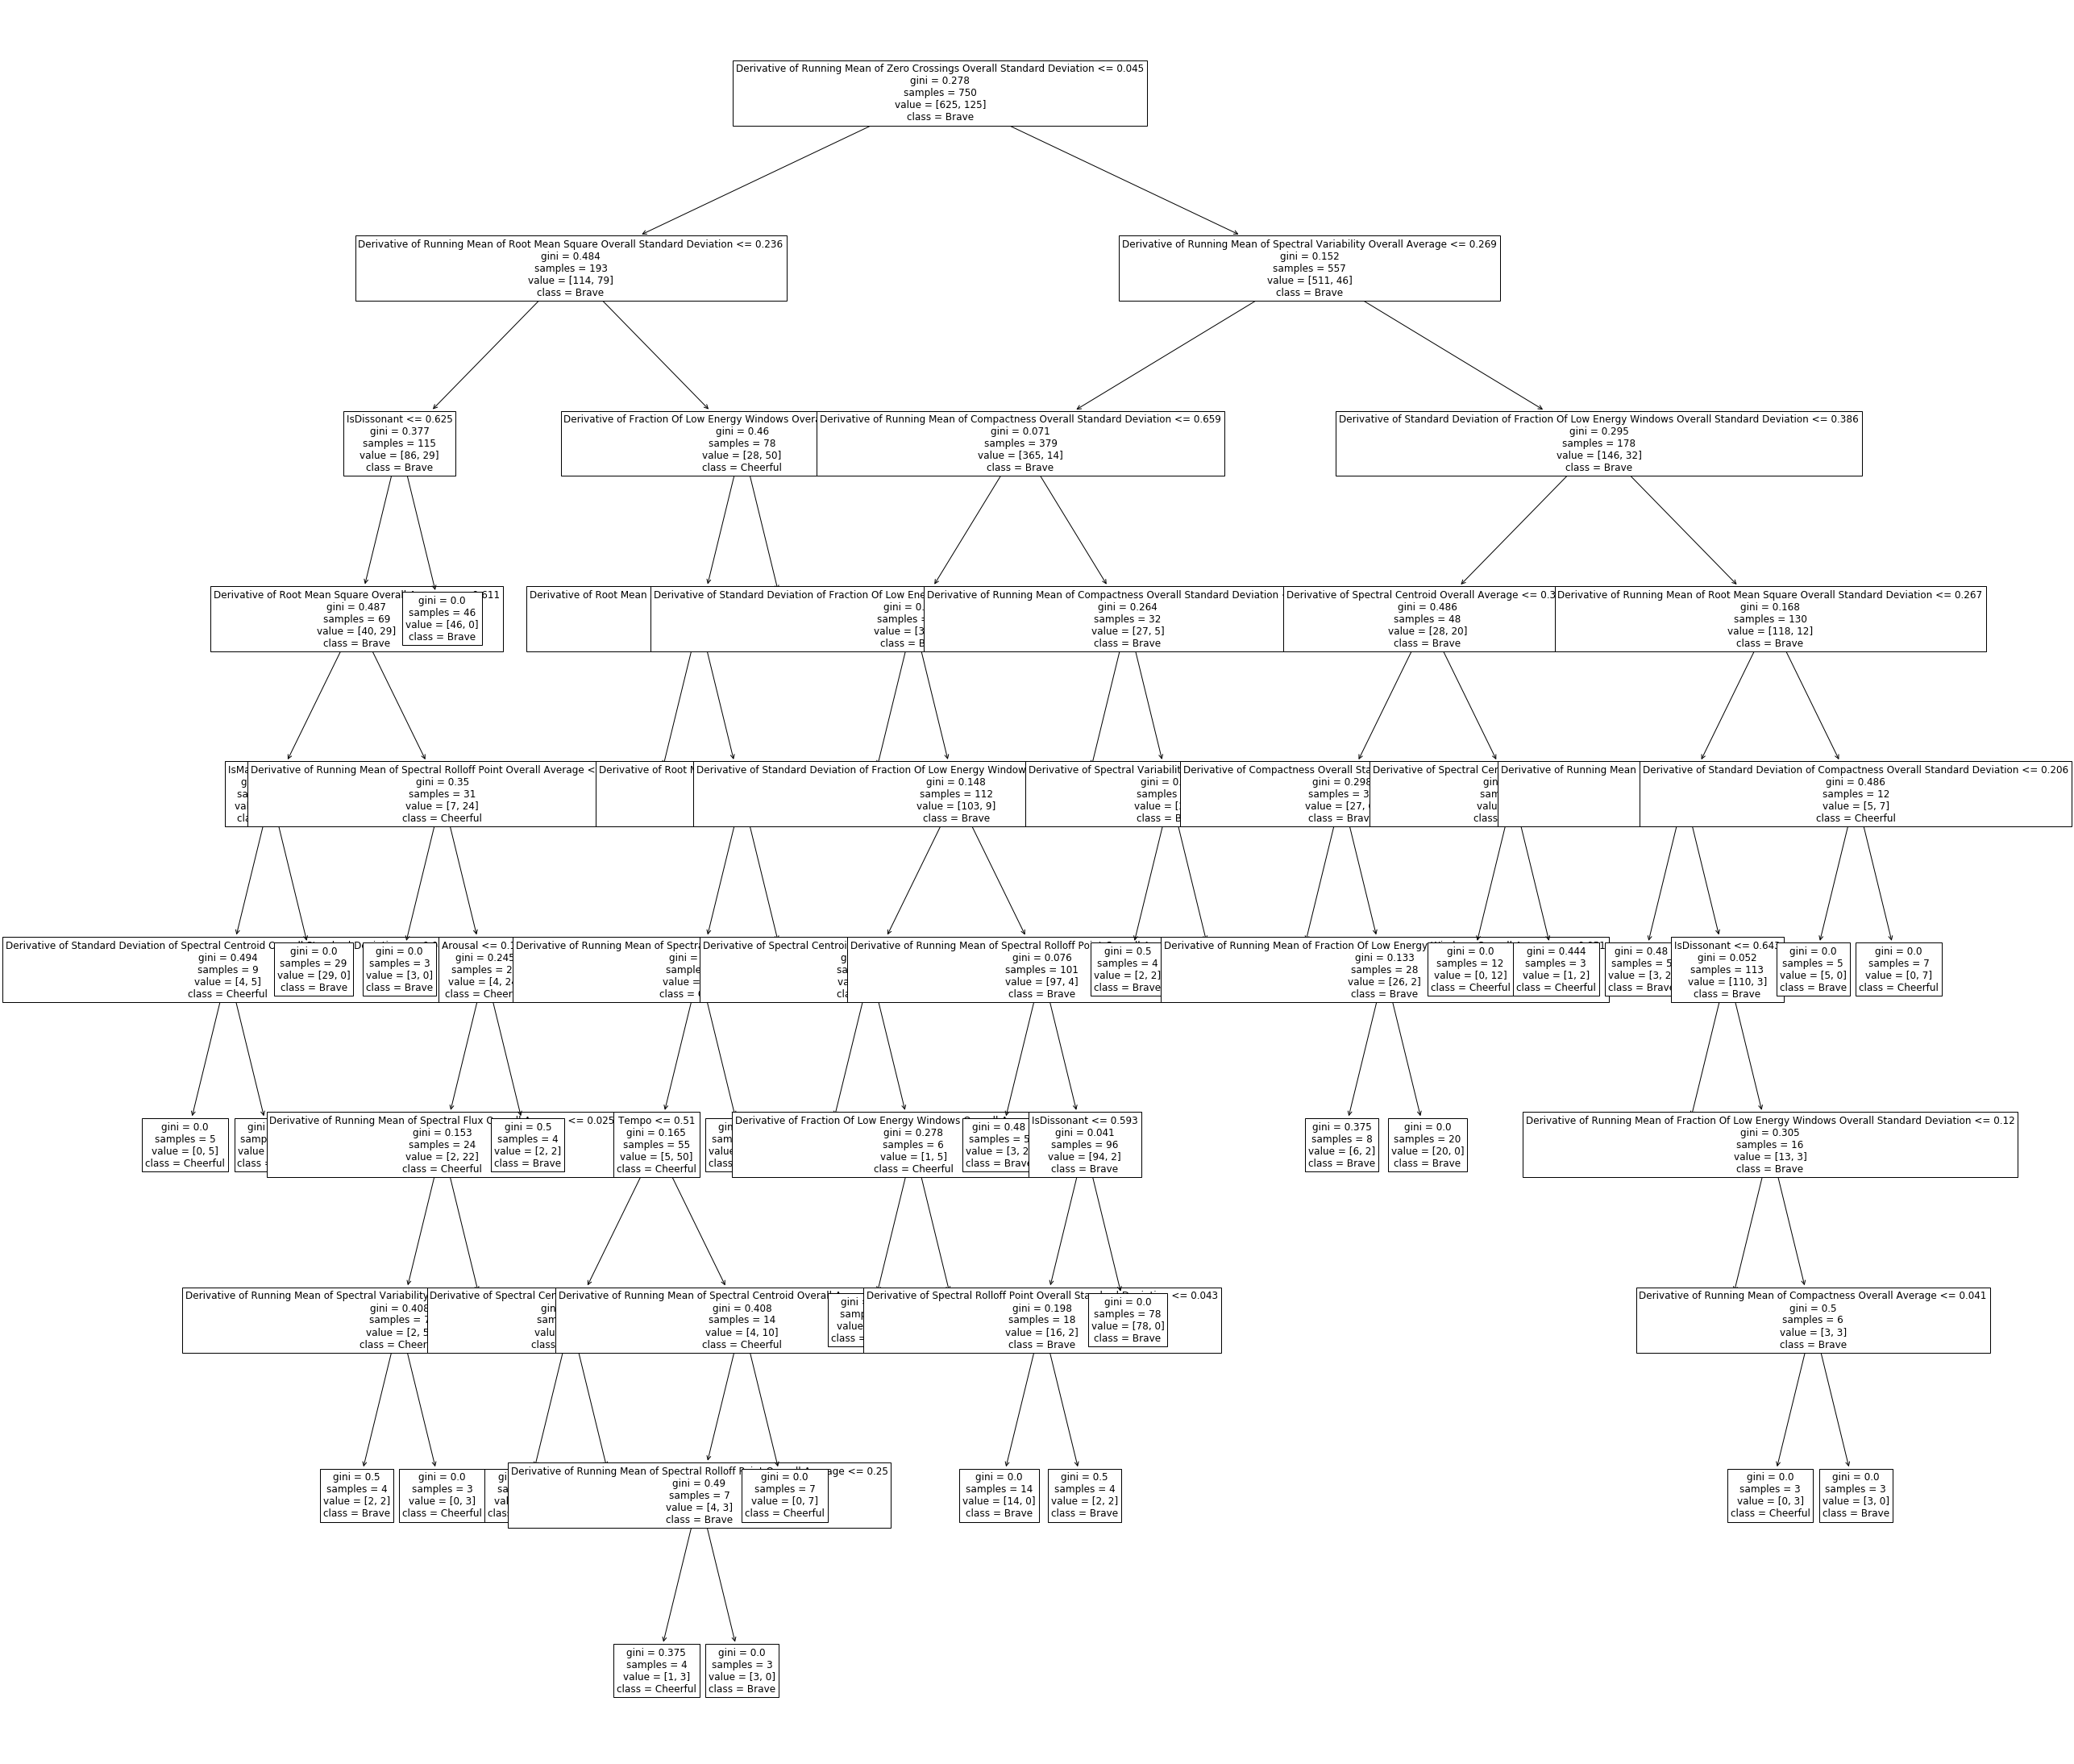

|--- Derivative of MFCC Overall Standard Deviation <= 0.04
|   |--- Spectral Rolloff Point Overall Standard Deviation <= 0.24
|   |   |--- Derivative of Running Mean of Zero Crossings Overall Average <= 0.62
|   |   |   |--- Derivative of Standard Deviation of Zero Crossings Overall Average <= 0.61
|   |   |   |   |--- Derivative of Running Mean of Spectral Variability Overall Average <= 0.28
|   |   |   |   |   |--- Derivative of Running Mean of Partial Based Spectral Flux Overall Average <= 0.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Derivative of Running Mean of Partial Based Spectral Flux Overall Average >  0.05
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Derivative of Running Mean of Spectral Variability Overall Average >  0.28
|   |   |   |   |   |--- class: 0
|   |   |   |--- Derivative of Standard Deviation of Zero Crossings Overall Average >  0.61
|   |   |   |   |--- Standard Deviation of Spectral Flux Overall Standard Deviation <= 0.09


Best Score: 0.8520
Random Oversampling Train Accuracy: 97.2000%


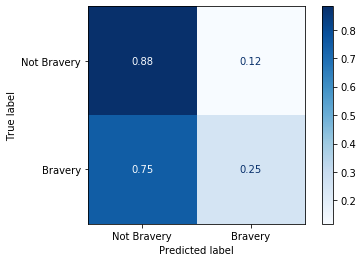

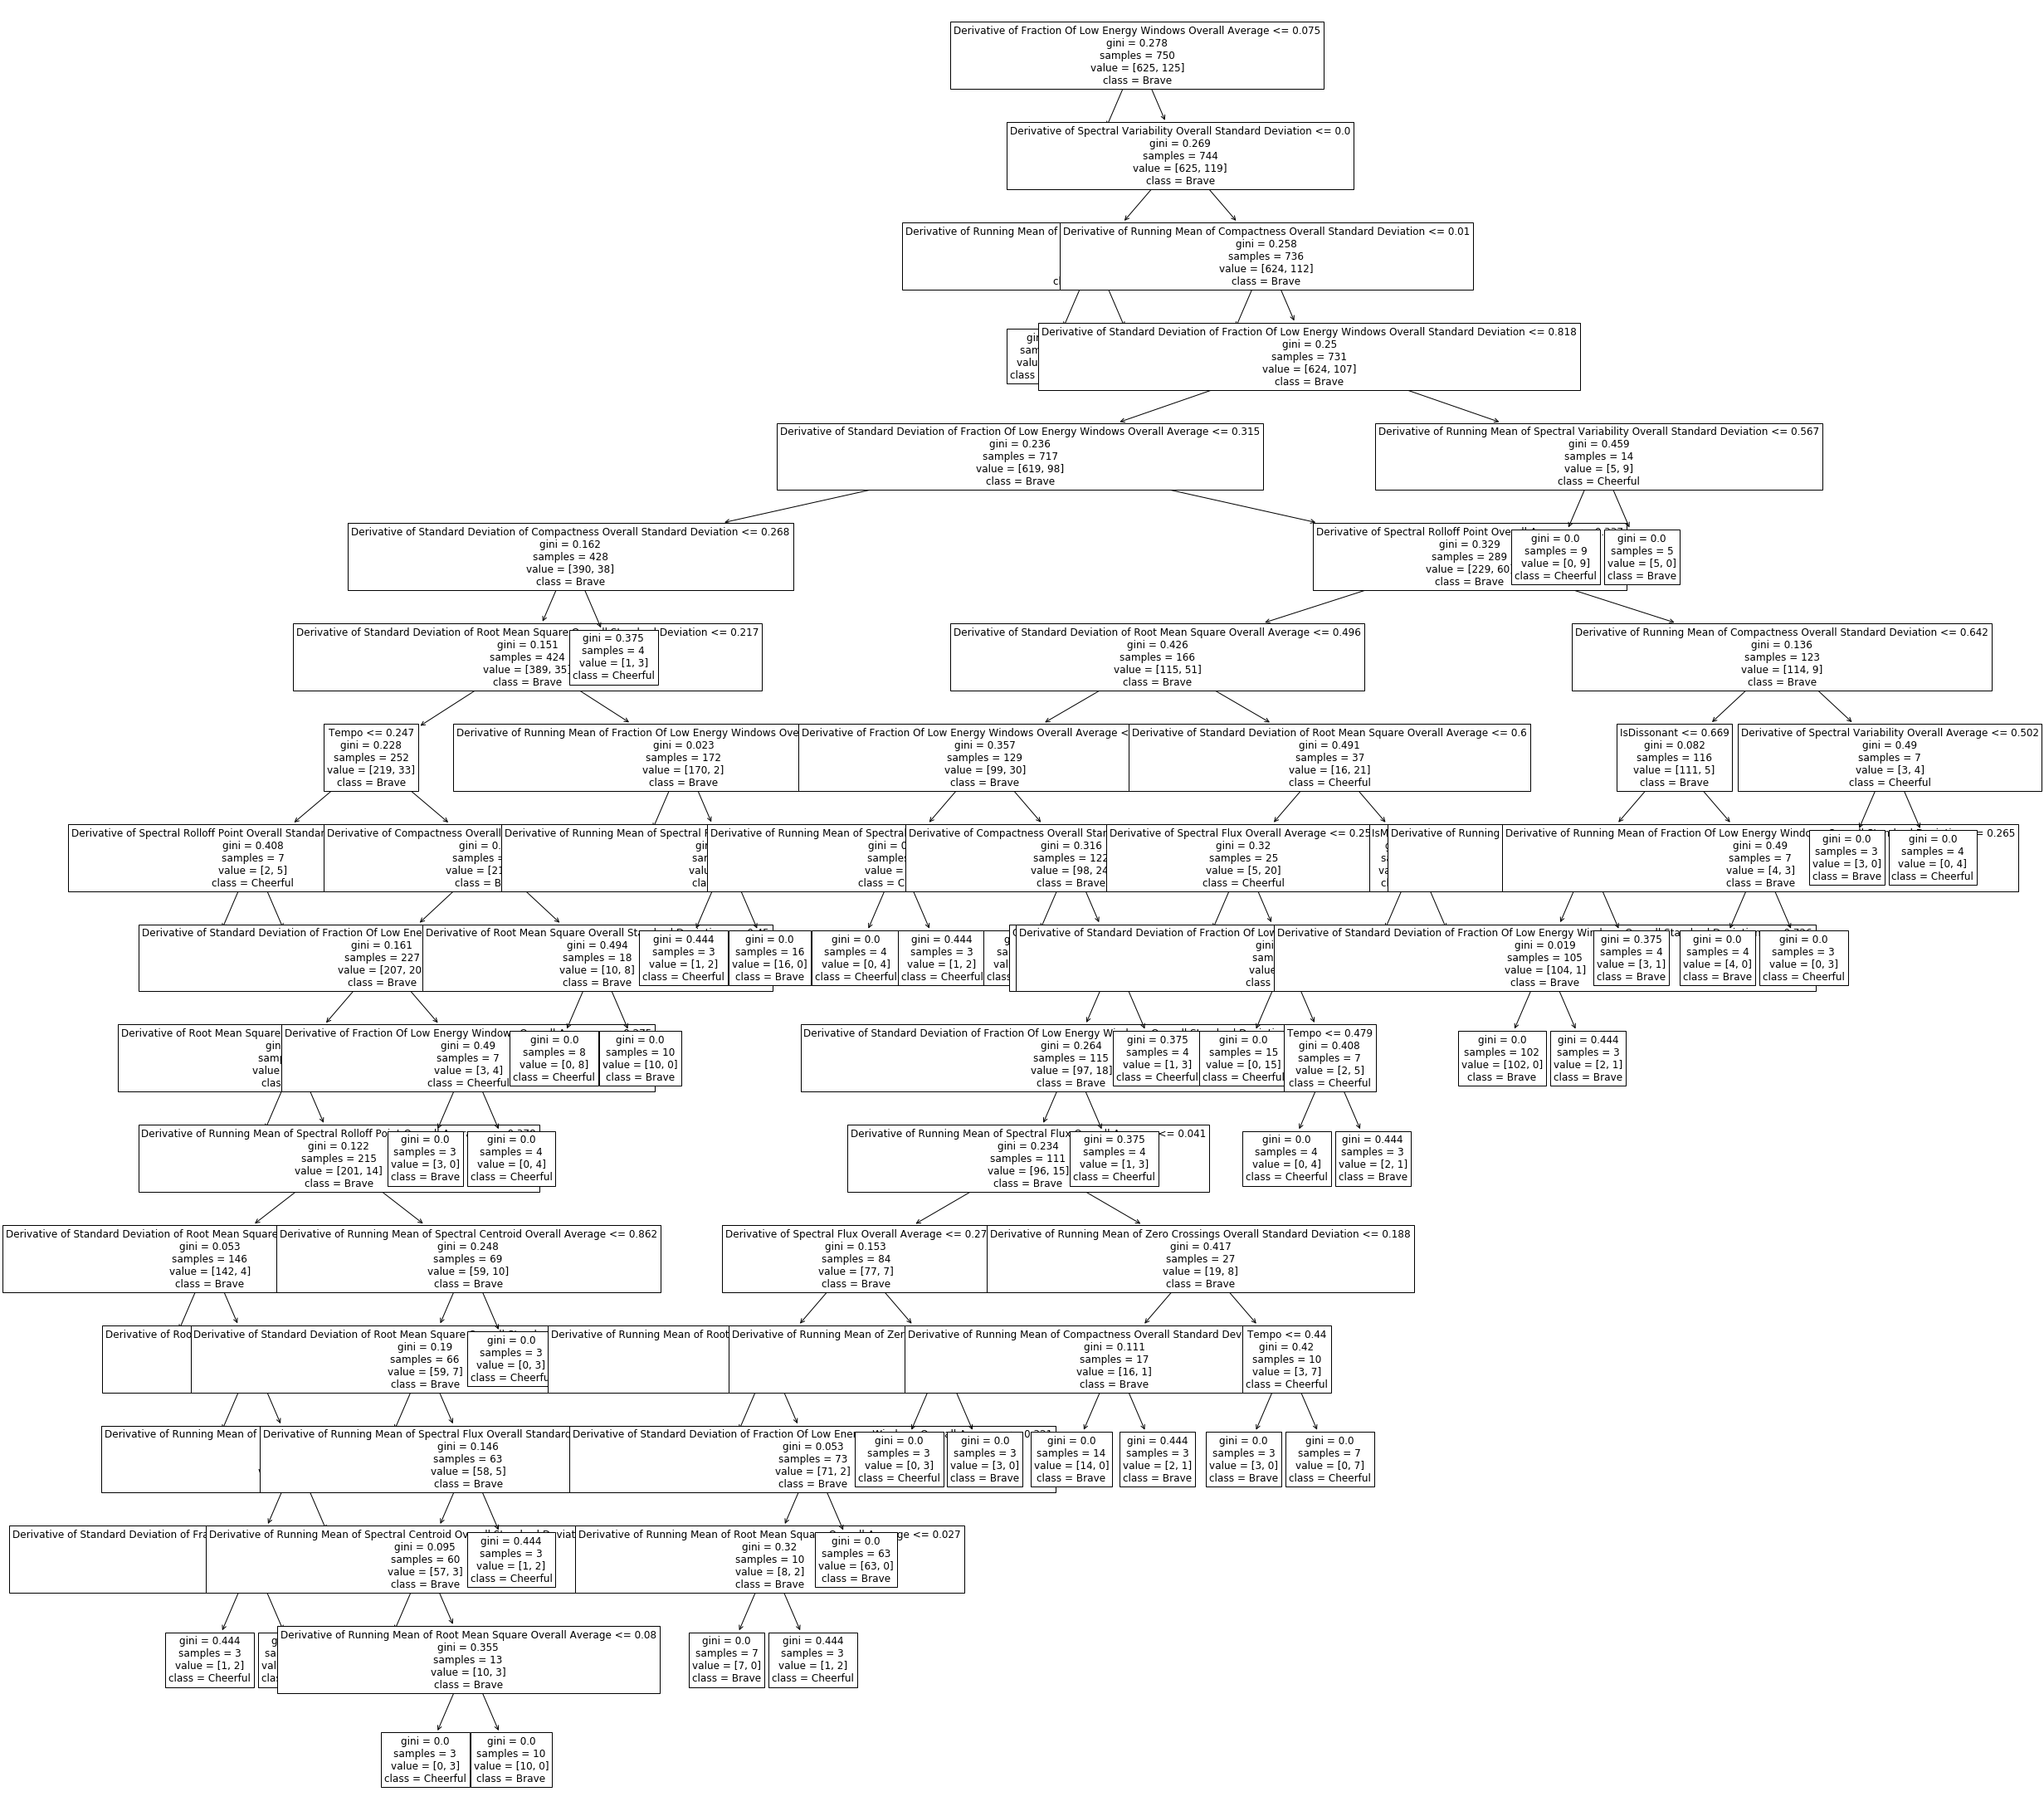

|--- Derivative of Standard Deviation of Spectral Variability Overall Average <= 0.08
|   |--- class: 1
|--- Derivative of Standard Deviation of Spectral Variability Overall Average >  0.08
|   |--- Derivative of Relative Difference Function Overall Standard Deviation <= 0.00
|   |   |--- Standard Deviation of Compactness Overall Average <= 0.77
|   |   |   |--- class: 1
|   |   |--- Standard Deviation of Compactness Overall Average >  0.77
|   |   |   |--- class: 1
|   |--- Derivative of Relative Difference Function Overall Standard Deviation >  0.00
|   |   |--- Running Mean of Spectral Flux Overall Average <= 0.01
|   |   |   |--- class: 1
|   |   |--- Running Mean of Spectral Flux Overall Average >  0.01
|   |   |   |--- Derivative of Running Mean of LPC Overall Standard Deviation <= 0.82
|   |   |   |   |--- Derivative of Running Mean of LPC Overall Average <= 0.32
|   |   |   |   |   |--- Derivative of Running Mean of Beat Sum Overall Standard Deviation <= 0.27
|   |   |   |   | 

Best Score: 0.9640
Random Oversampling Train Accuracy: 99.2000%


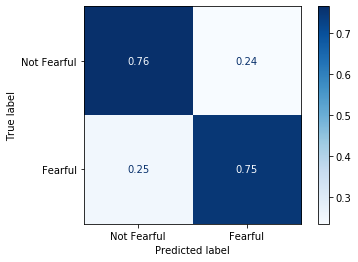

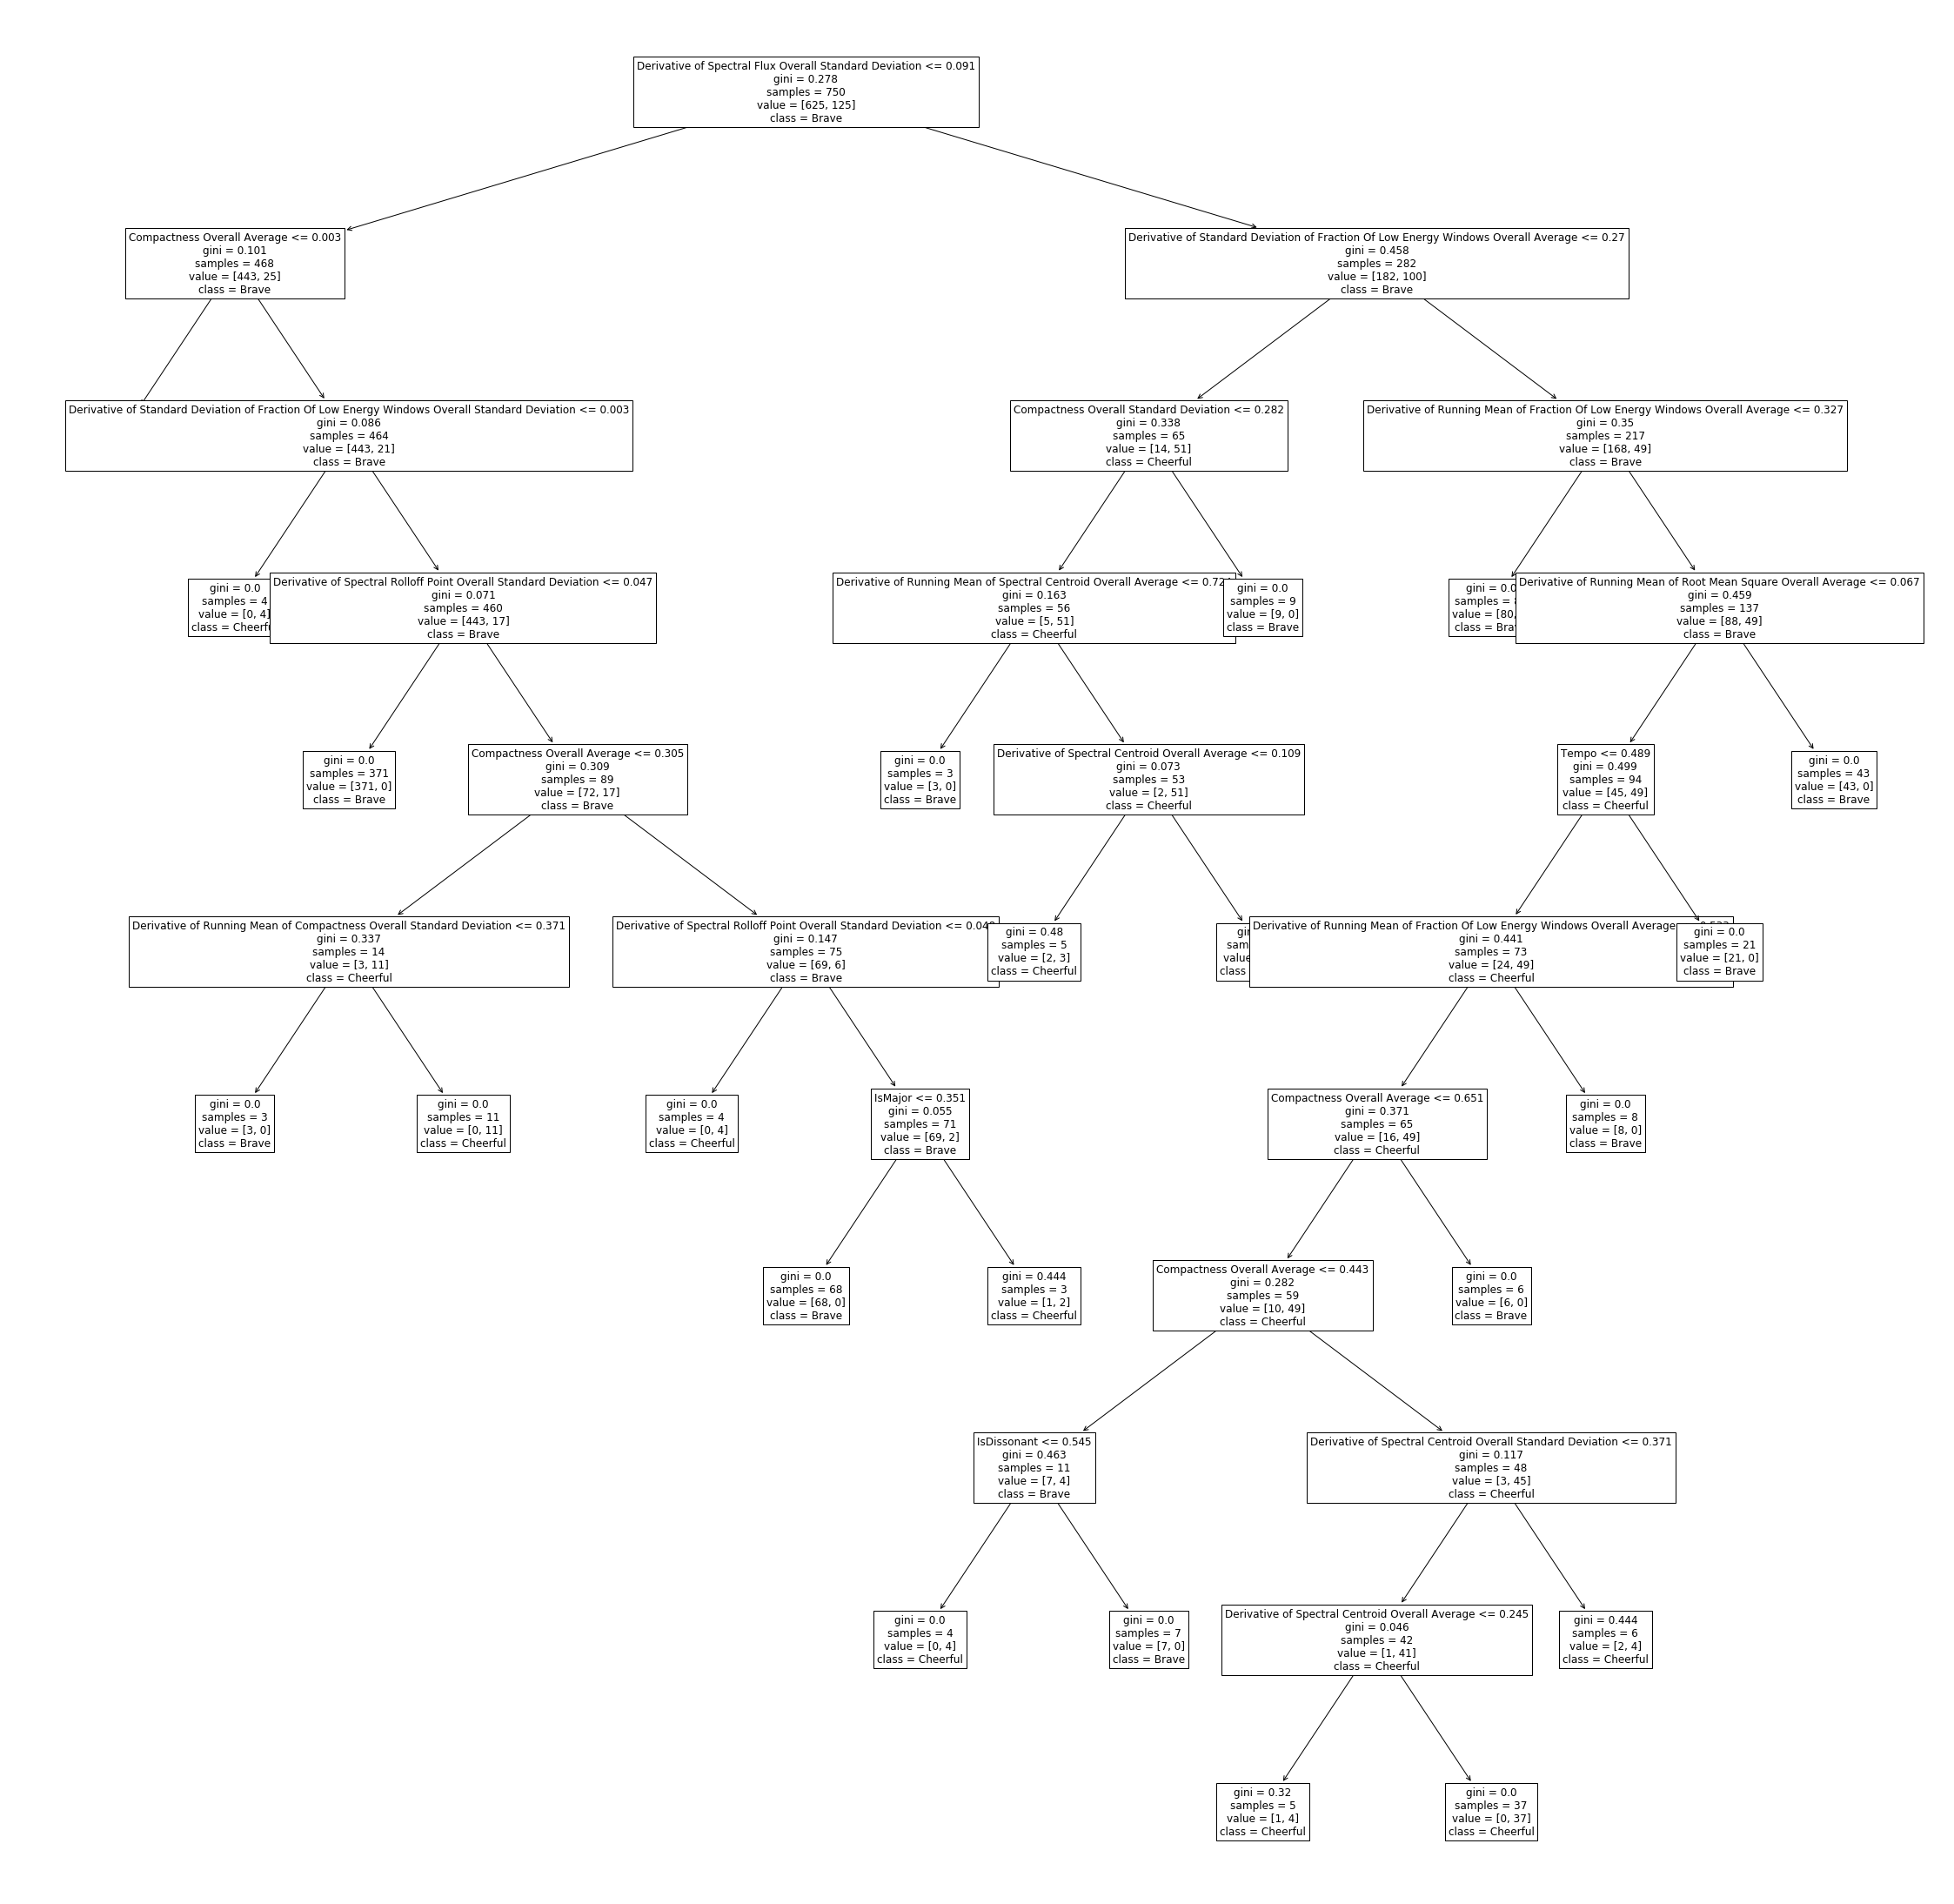

|--- Derivative of Partial Based Spectral Flux Overall Standard Deviation <= 0.09
|   |--- Derivative of Spectral Centroid Overall Standard Deviation <= 0.00
|   |   |--- class: 1
|   |--- Derivative of Spectral Centroid Overall Standard Deviation >  0.00
|   |   |--- Derivative of Running Mean of LPC Overall Standard Deviation <= 0.00
|   |   |   |--- class: 1
|   |   |--- Derivative of Running Mean of LPC Overall Standard Deviation >  0.00
|   |   |   |--- Derivative of Peak Based Spectral Smoothness Overall Standard Deviation <= 0.05
|   |   |   |   |--- class: 0
|   |   |   |--- Derivative of Peak Based Spectral Smoothness Overall Standard Deviation >  0.05
|   |   |   |   |--- Derivative of Spectral Centroid Overall Standard Deviation <= 0.31
|   |   |   |   |   |--- Running Mean of Spectral Flux Overall Average <= 0.37
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Running Mean of Spectral Flux Overall Average >  0.37
|   |   |   |   |   |   |--- class: 1
|   |   

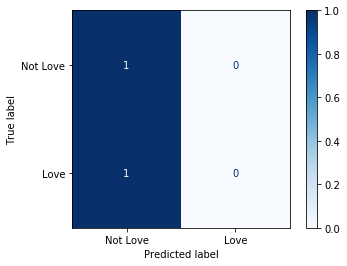

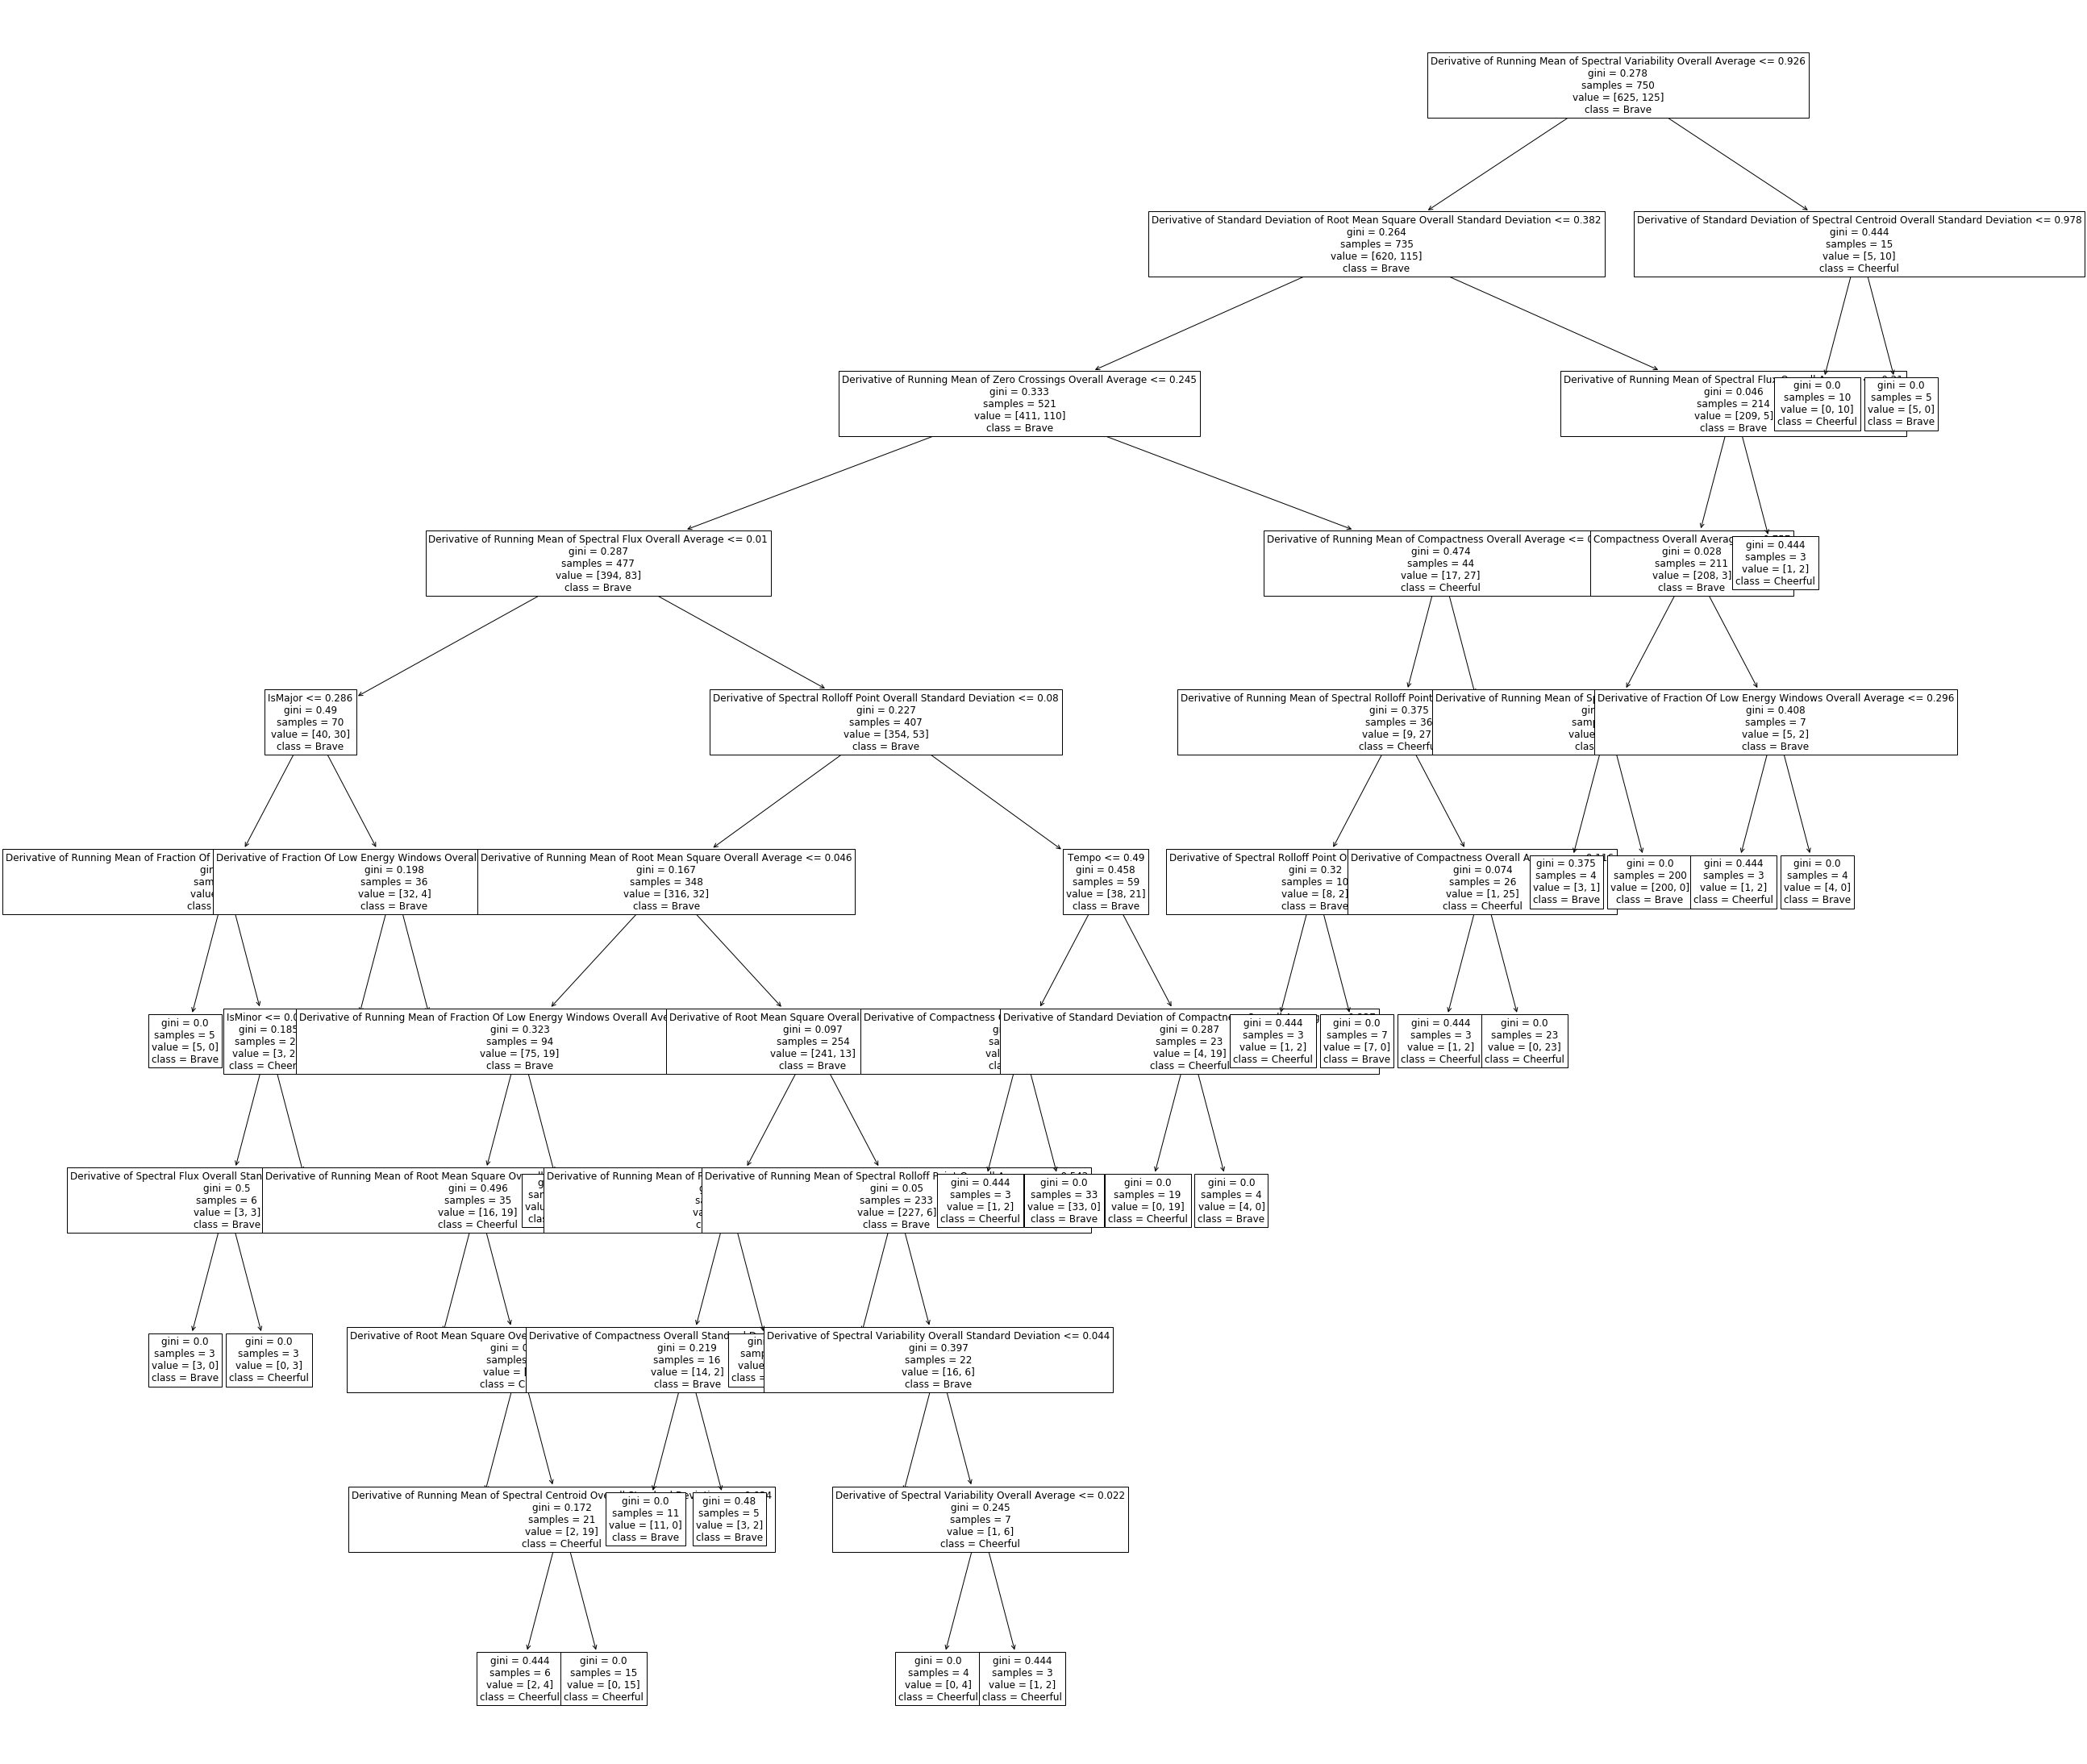

|--- Derivative of Method of Moments Overall Average <= 0.93
|   |--- Derivative of Running Mean of MFCC Overall Average <= 0.38
|   |   |--- Derivative of MFCC Overall Average <= 0.24
|   |   |   |--- Standard Deviation of Spectral Centroid Overall Standard Deviation <= 0.01
|   |   |   |   |--- Derivative of Running Mean of Spectral Variability Overall Average <= 0.29
|   |   |   |   |   |--- Running Mean of Spectral Flux Overall Standard Deviation <= 0.07
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Running Mean of Spectral Flux Overall Standard Deviation >  0.07
|   |   |   |   |   |   |--- Derivative of Running Mean of Spectral Variability Overall Standard Deviation <= 0.08
|   |   |   |   |   |   |   |--- Derivative of Partial Based Spectral Flux Overall Standard Deviation <= 0.07
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Derivative of Partial Based Spectral Flux Overall Standard Deviation >  0.07
|   |   |   |   |   |   |   

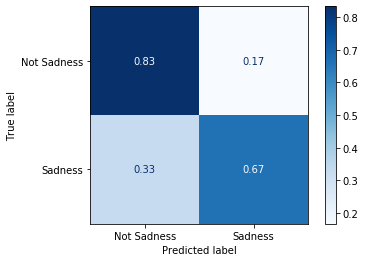

In [7]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],rscv,themes[i], verbose = False)
    disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
    disp_rules(rscv.best_estimator_, features)
    test_res("Random Oversampling",x_val,ovr_val[i],rscv,themes[i])

Best Score: 0.8387
criterion => gini
max_depth => 9
min_samples_leaf => 0.00022802298426716607
min_samples_split => 0.956353118248733
splitter => random
Splits: 5
SMOTE Train Accuracy: 84.0000%


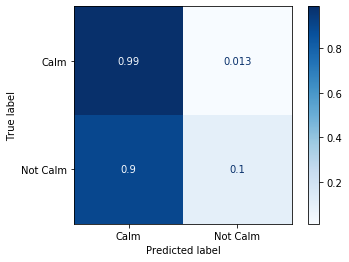

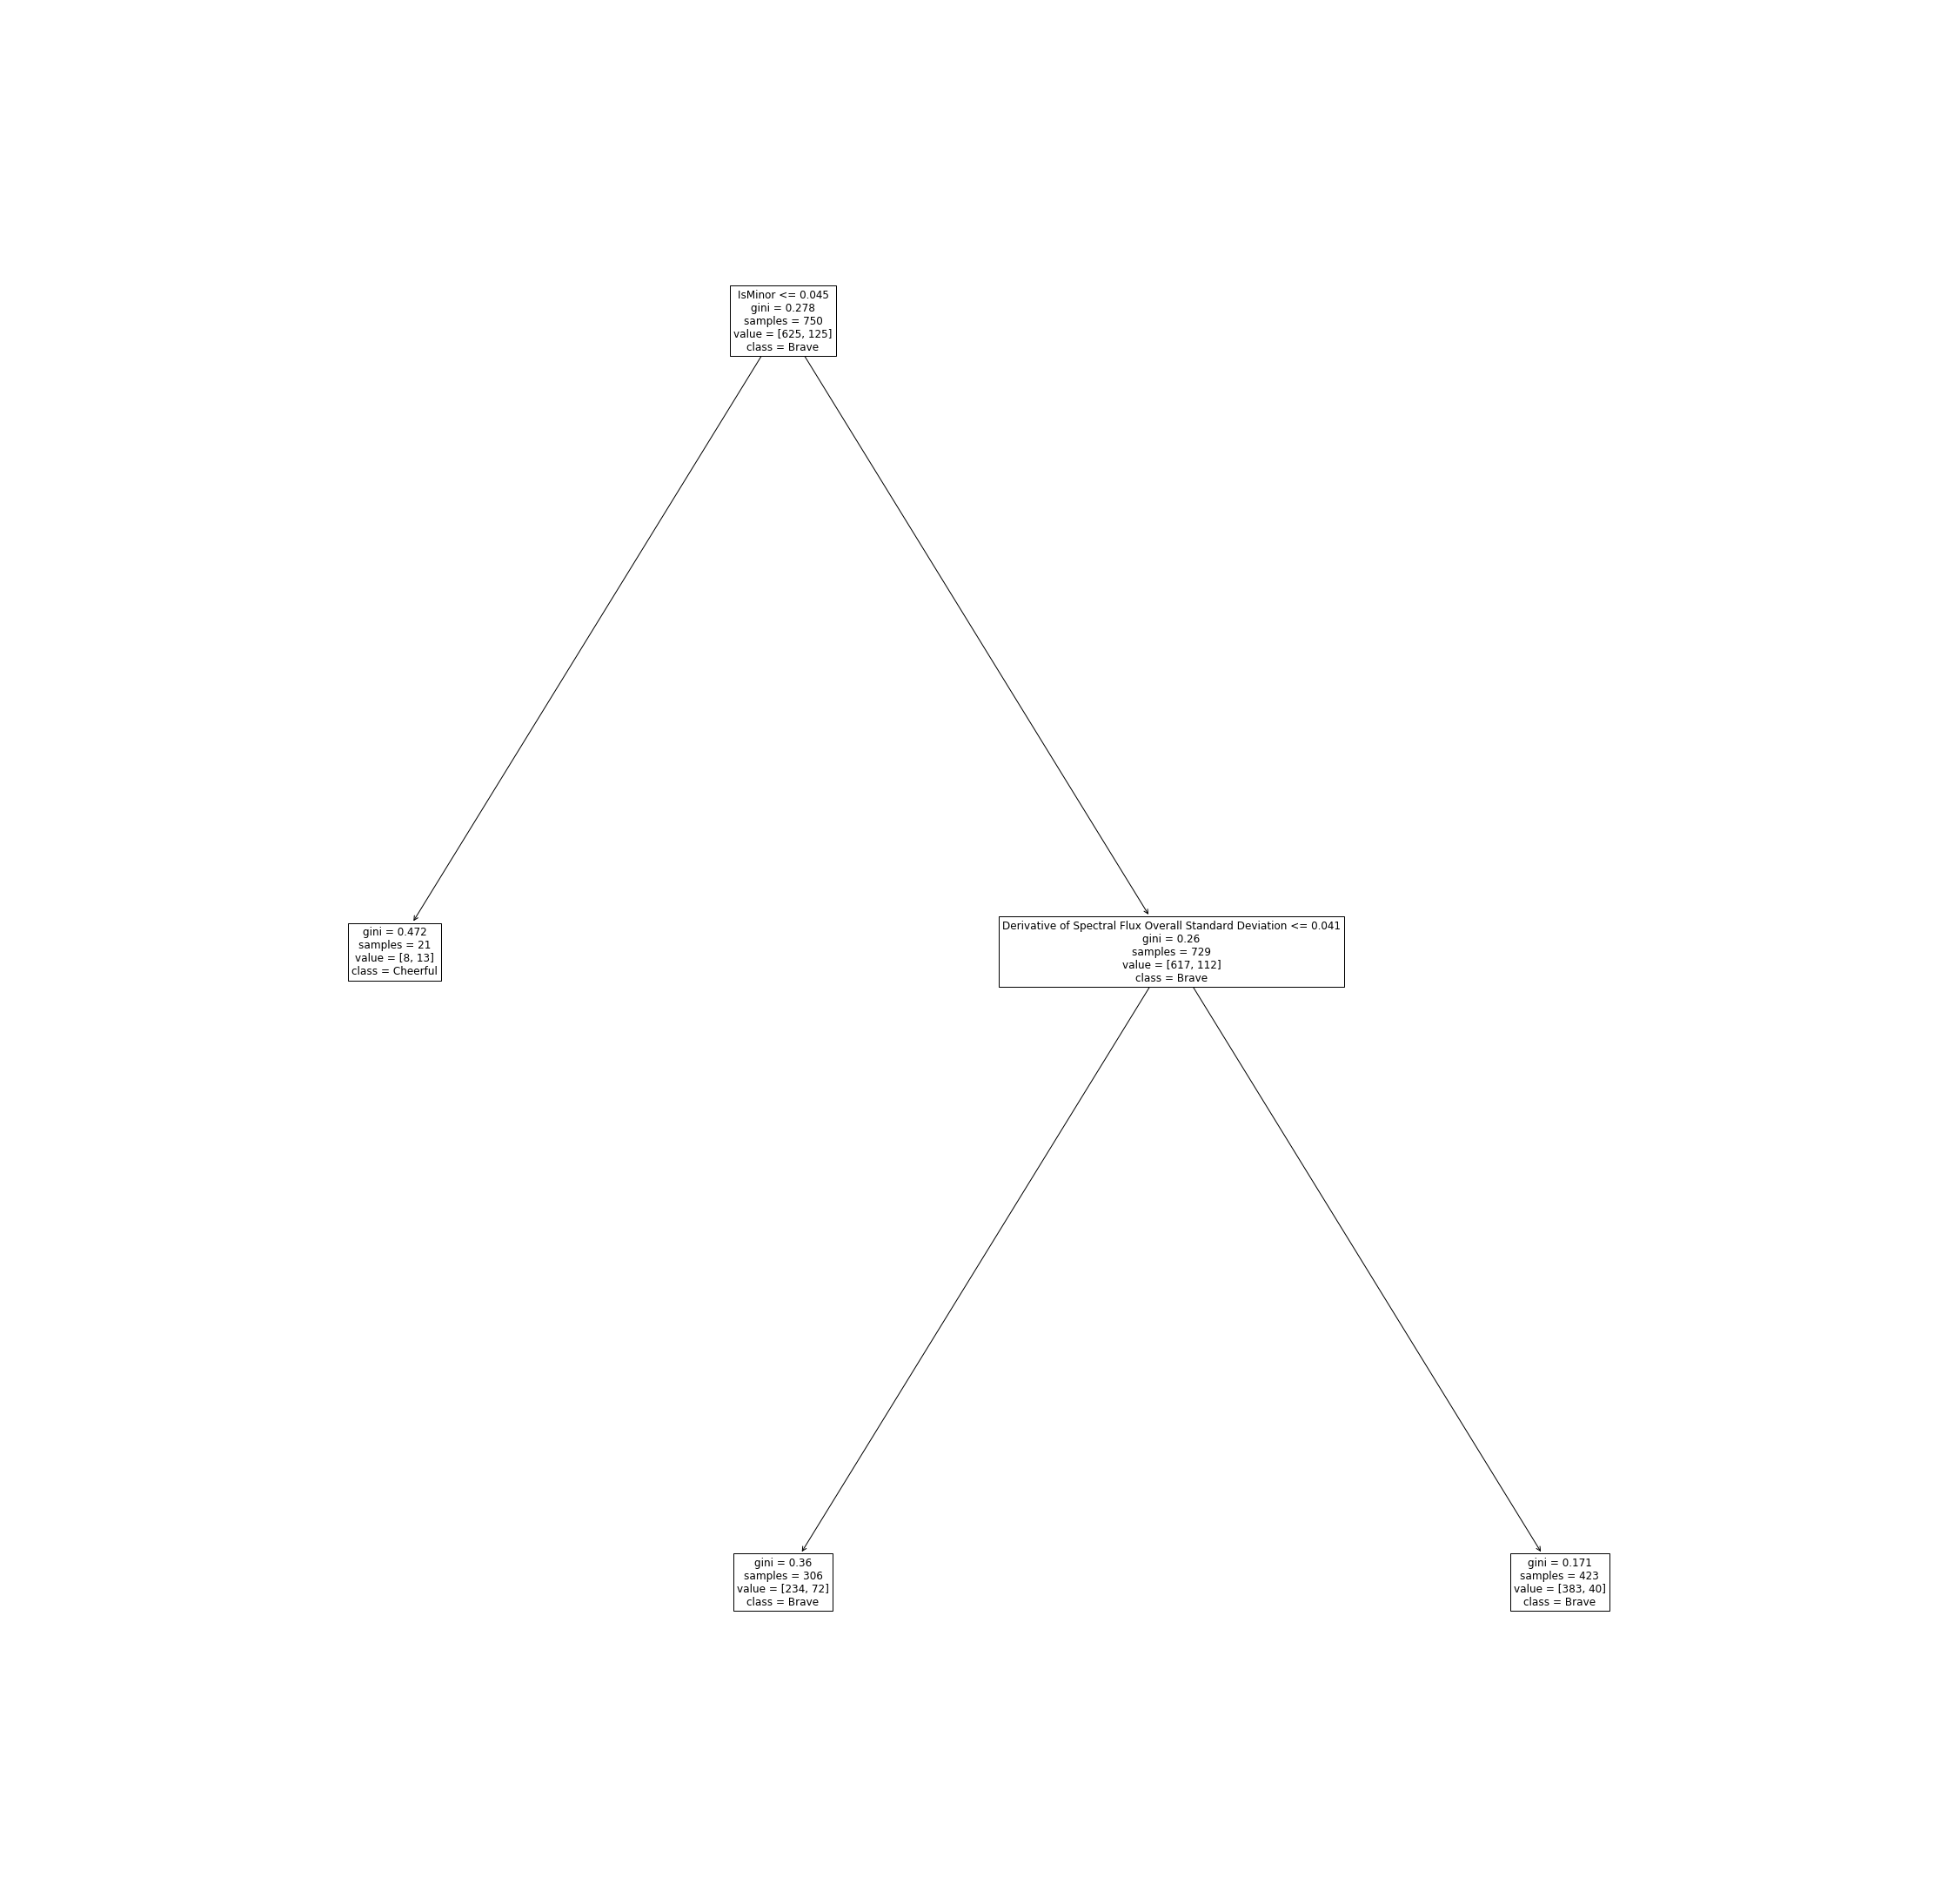

|--- Derivative of Running Mean of Spectral Variability Overall Standard Deviation <= 0.04
|   |--- class: 1
|--- Derivative of Running Mean of Spectral Variability Overall Standard Deviation >  0.04
|   |--- Derivative of Partial Based Spectral Flux Overall Standard Deviation <= 0.04
|   |   |--- class: 0
|   |--- Derivative of Partial Based Spectral Flux Overall Standard Deviation >  0.04
|   |   |--- class: 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 80.95%
SMOTE F1-score: 0.72

Best Score: 0.8467
criterion => gini
max_depth => 36
min_samples_leaf => 0.0031299385321771384
min_samples_split => 0.0022751910270725206
splitter => best
Splits: 5
SMOTE Train Accuracy: 97.6000%


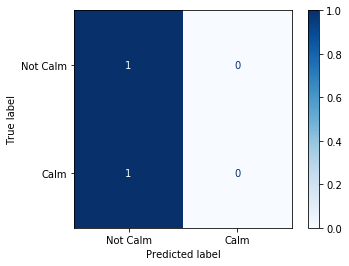

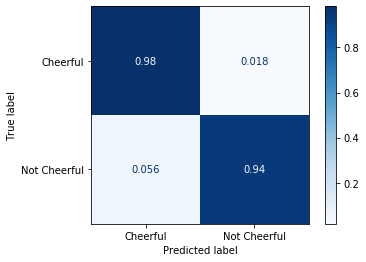

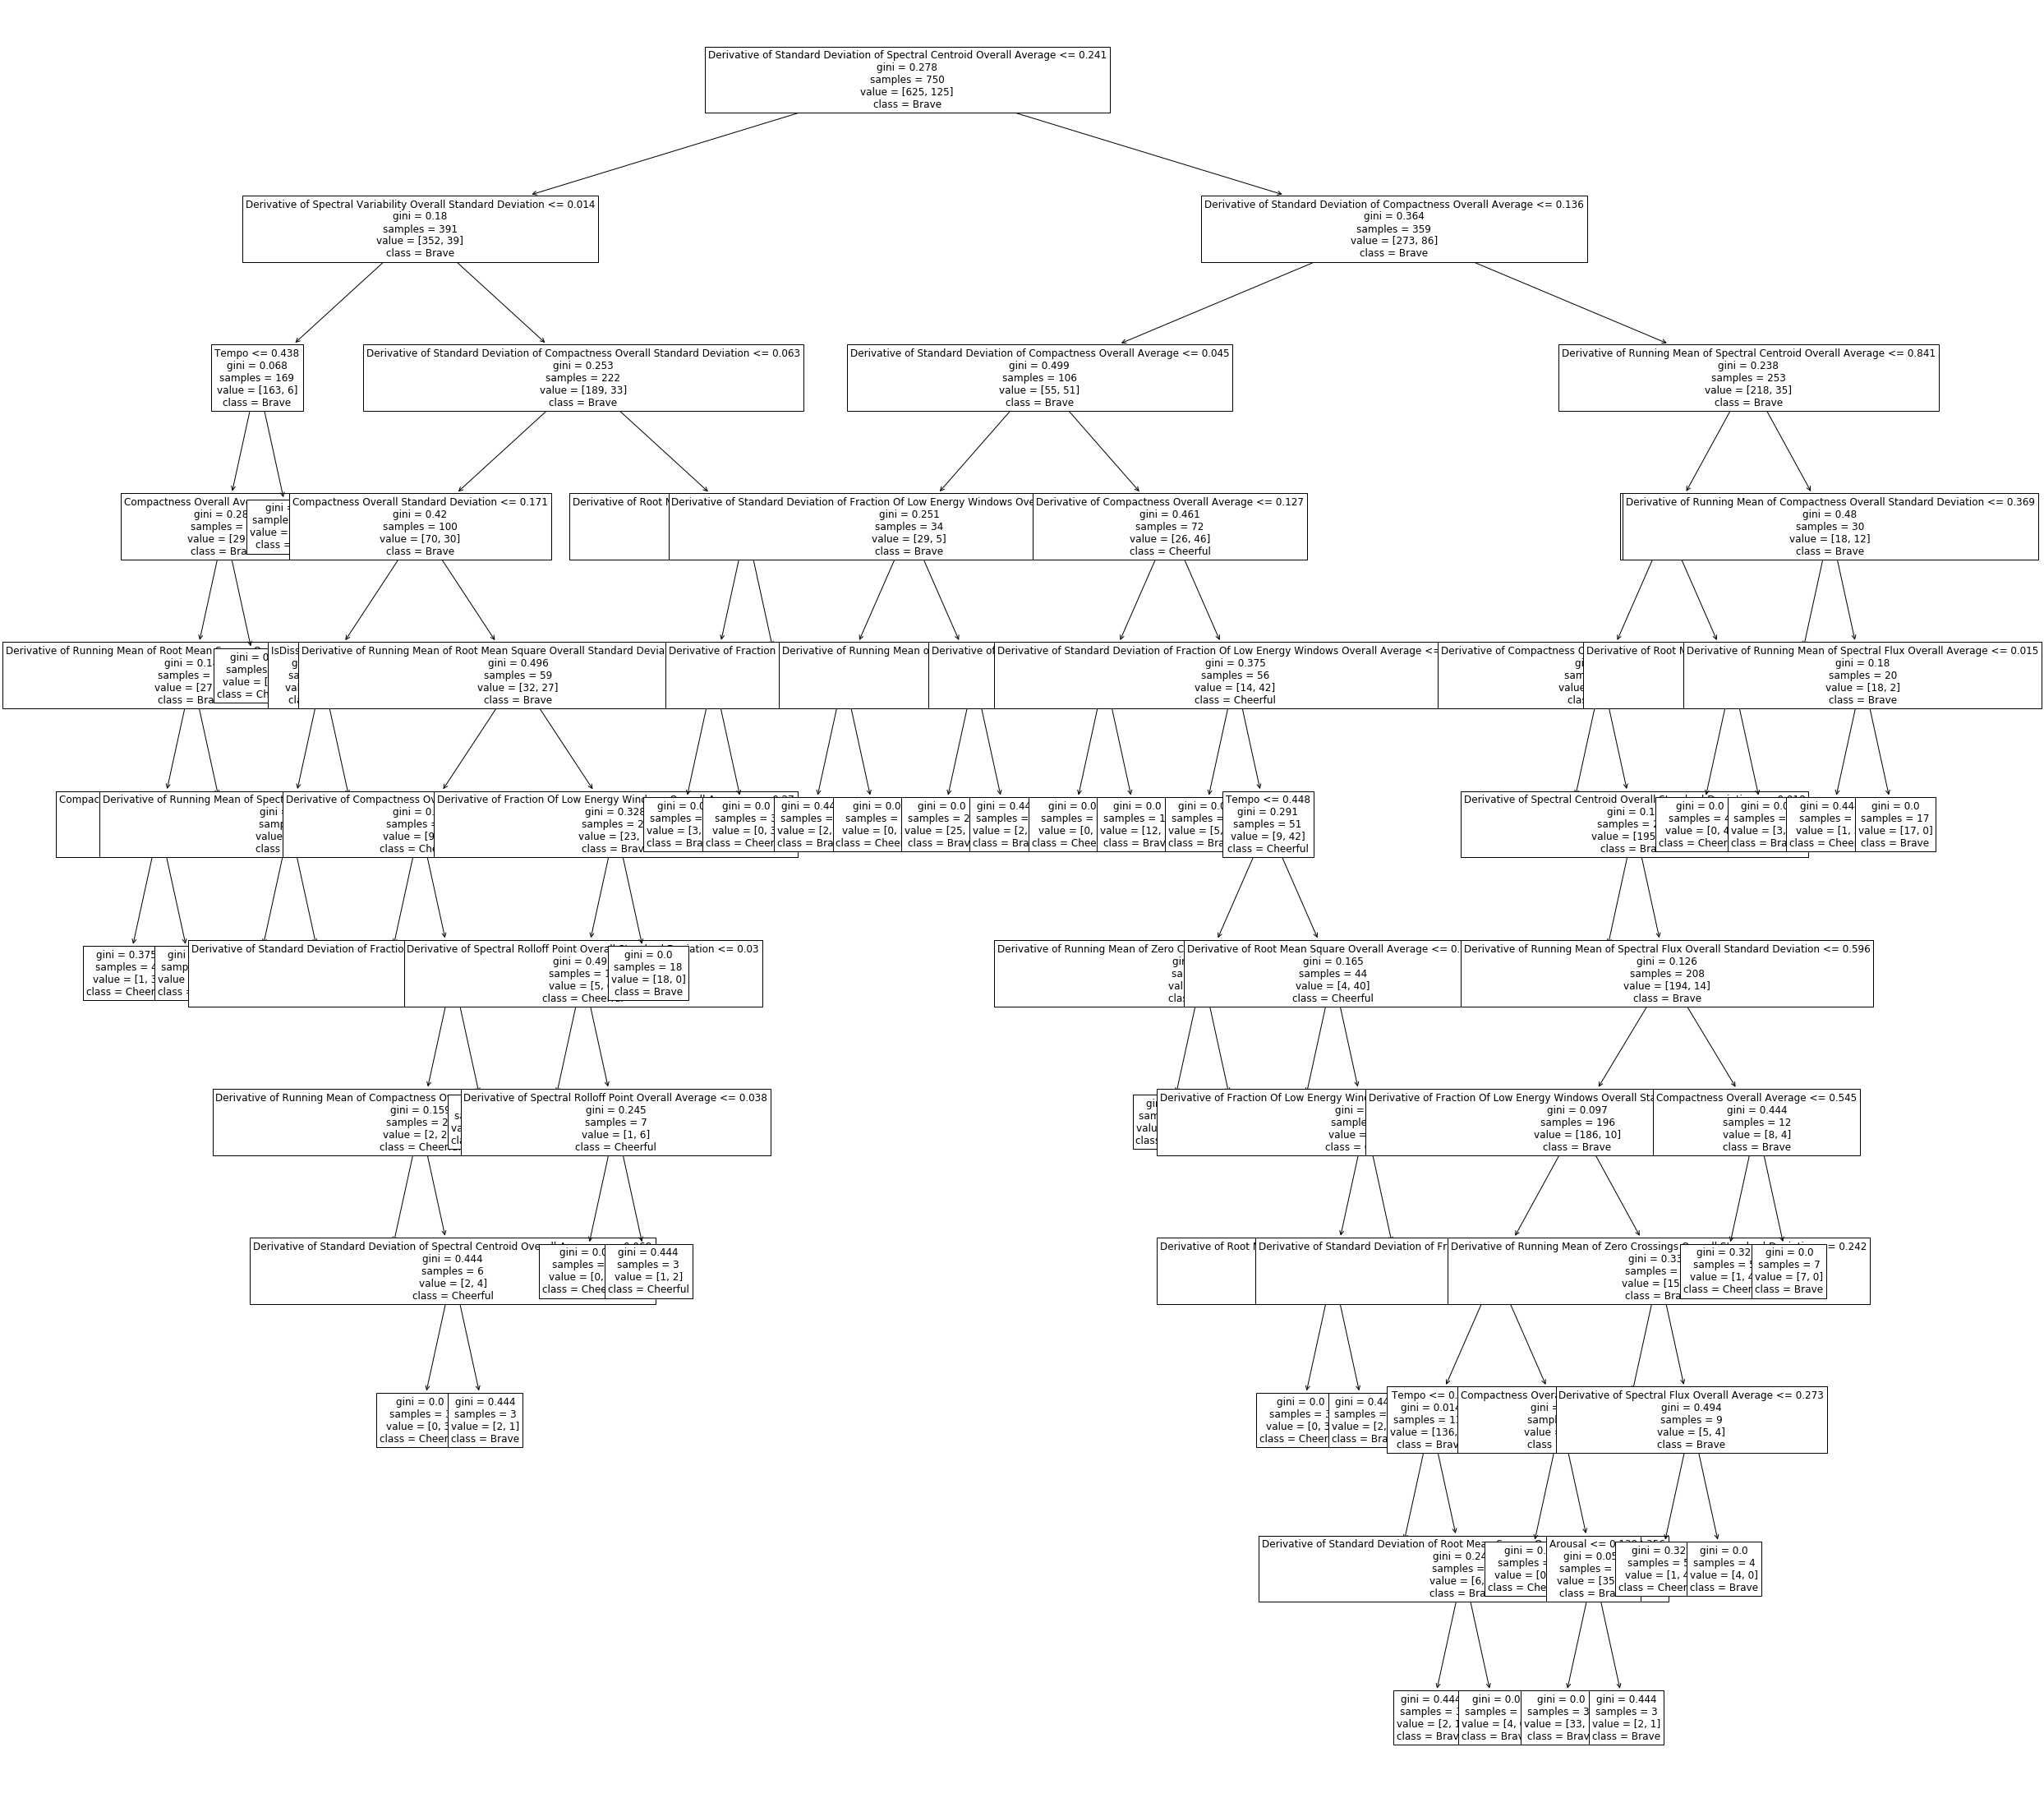

|--- Derivative of Running Mean of Partial Based Spectral Centroid Overall Average <= 0.24
|   |--- Derivative of Relative Difference Function Overall Standard Deviation <= 0.01
|   |   |--- Derivative of Running Mean of Fraction Of Low Energy Windows Overall Average <= 0.44
|   |   |   |--- Derivative of Spectral Centroid Overall Standard Deviation <= 0.64
|   |   |   |   |--- Spectral Centroid Overall Average <= 0.05
|   |   |   |   |   |--- Derivative of Spectral Centroid Overall Standard Deviation <= 0.44
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Derivative of Spectral Centroid Overall Standard Deviation >  0.44
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Spectral Centroid Overall Average >  0.05
|   |   |   |   |   |--- class: 0
|   |   |   |--- Derivative of Spectral Centroid Overall Standard Deviation >  0.64
|   |   |   |   |--- class: 1
|   |   |--- Derivative of Running Mean of Fraction Of Low Energy Windows Overall Average >  0.44
|   |   

Best Score: 0.8413
criterion => entropy
max_depth => 13
min_samples_leaf => 0.14331196521996728
min_samples_split => 0.24319906983880946
splitter => best
Splits: 5
SMOTE Train Accuracy: 83.3333%


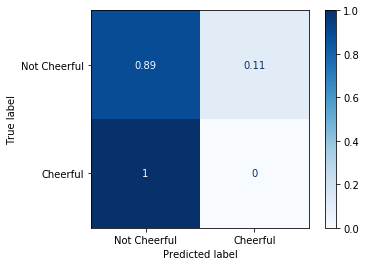

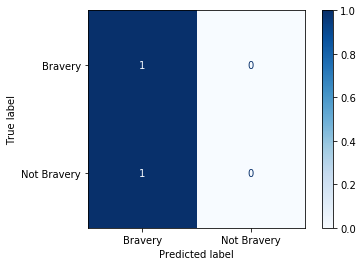

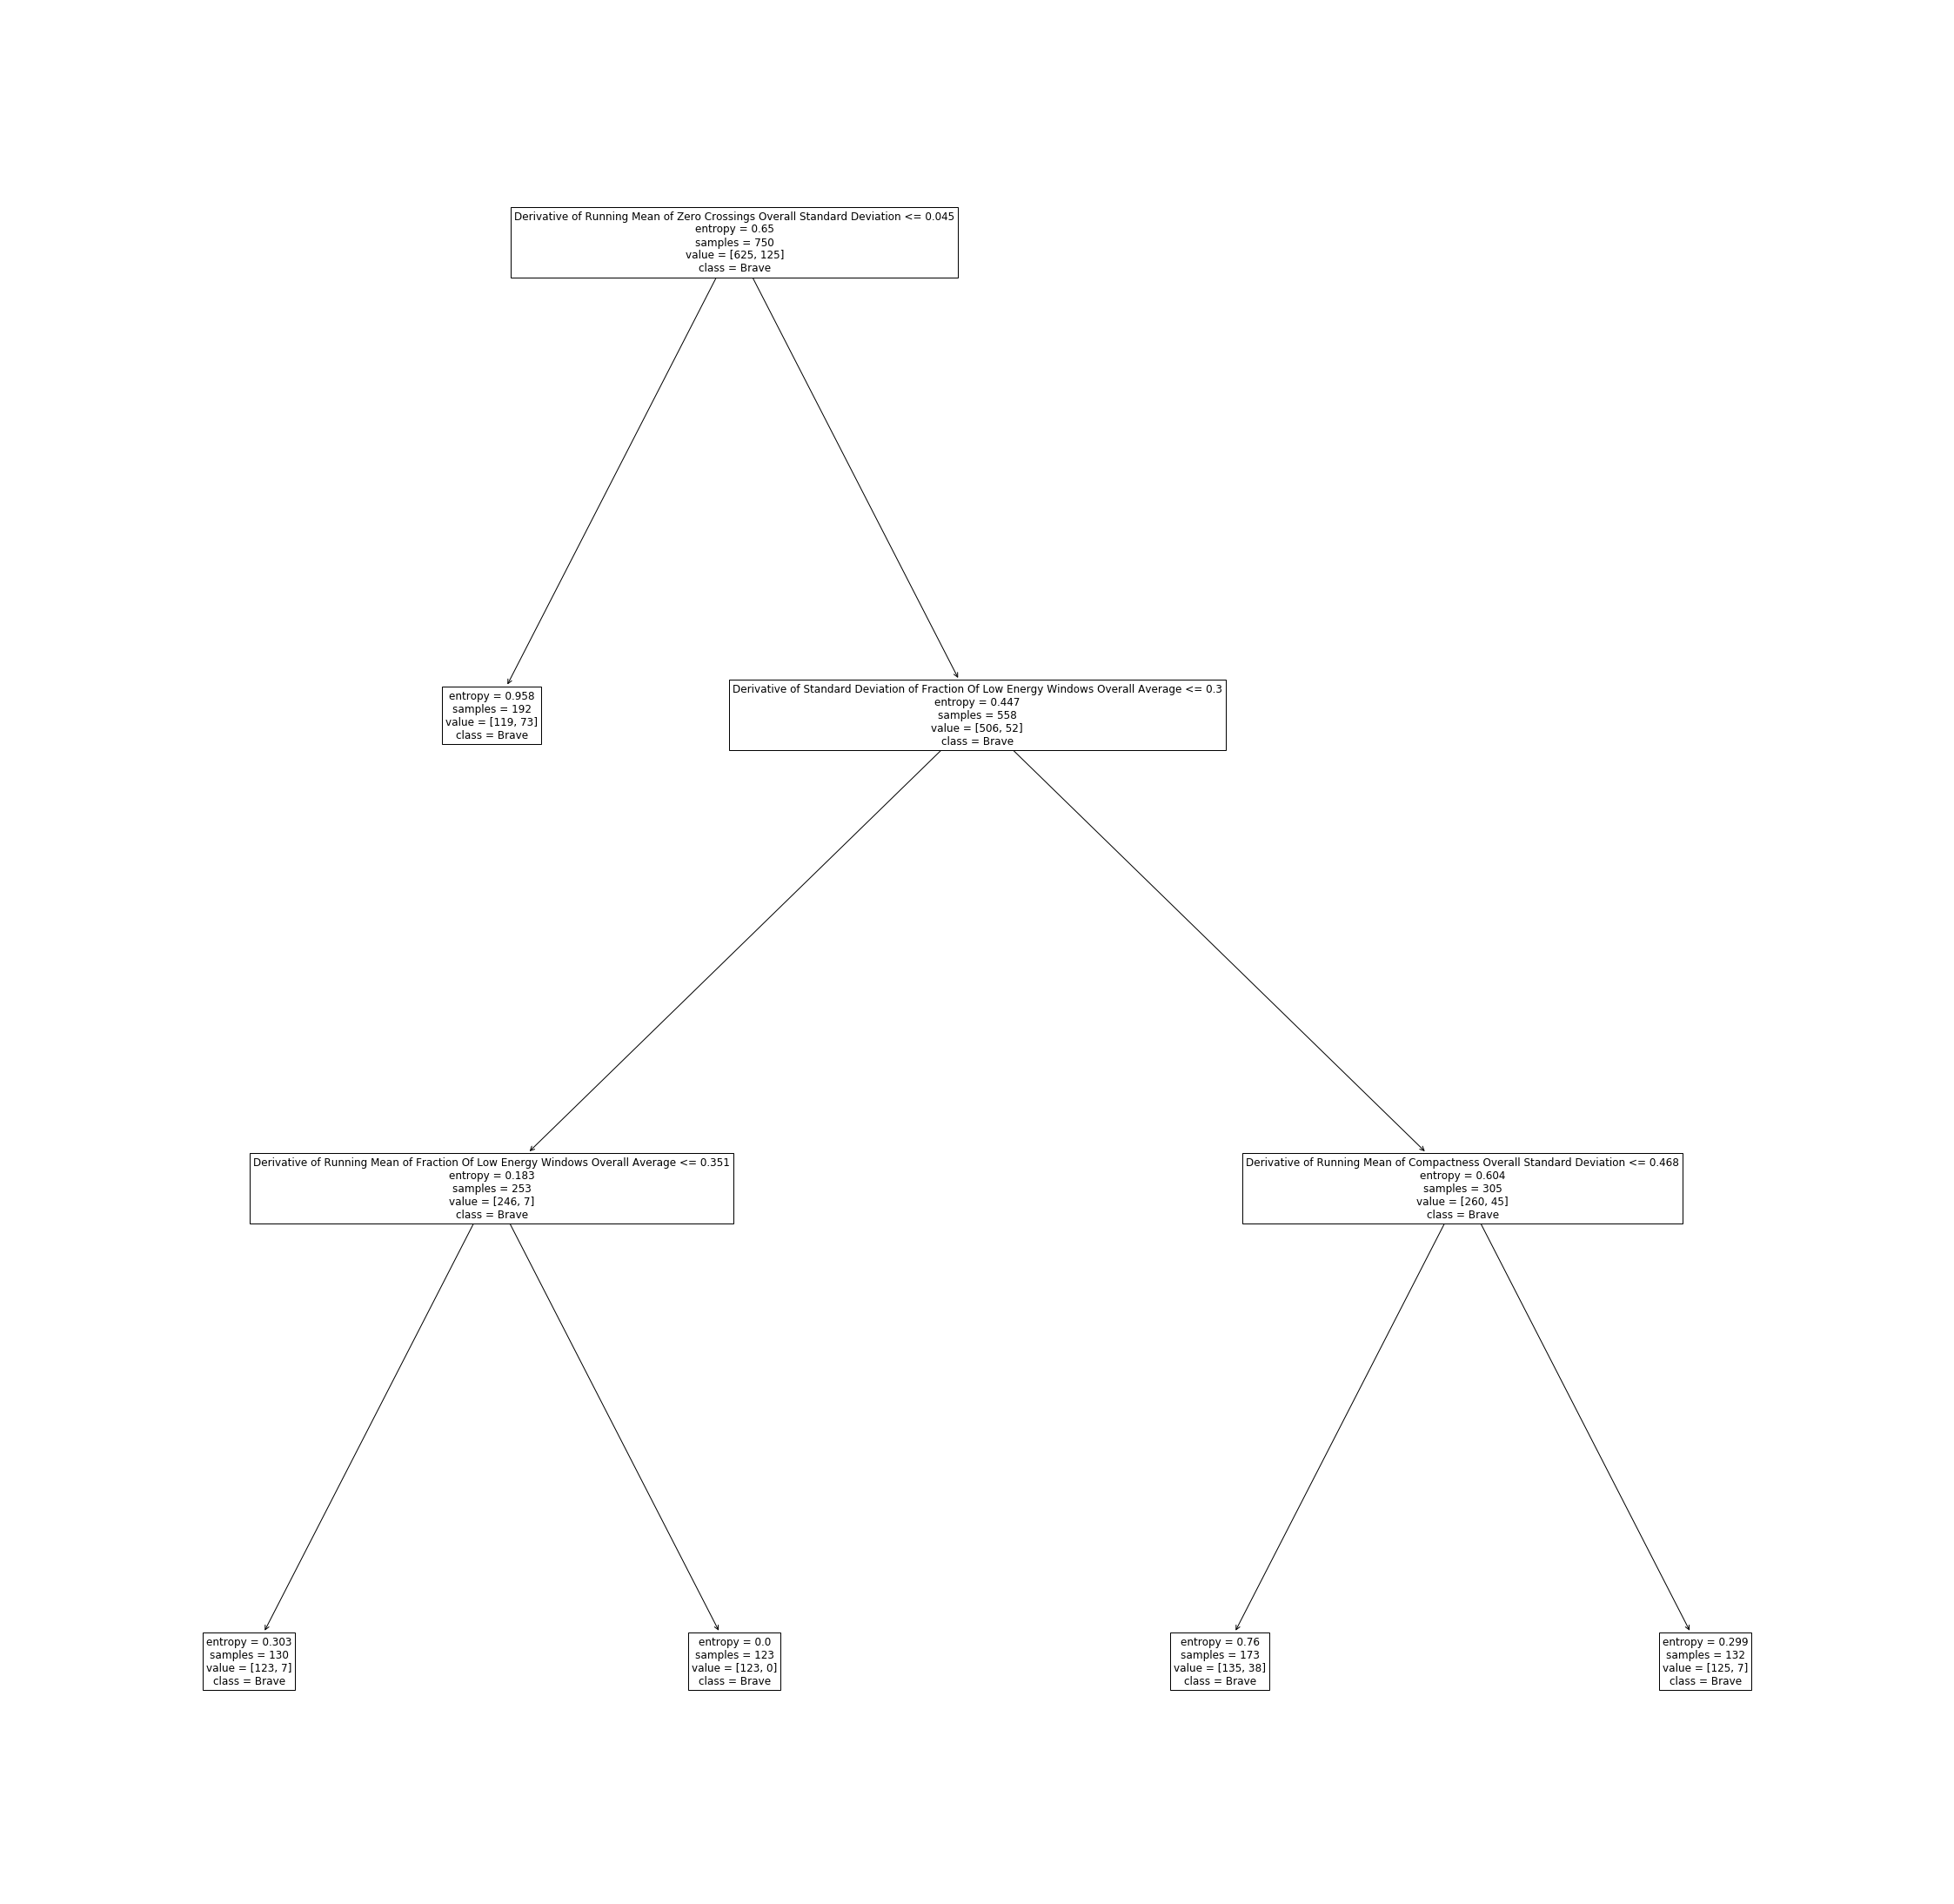

|--- Derivative of MFCC Overall Standard Deviation <= 0.05
|   |--- class: 0
|--- Derivative of MFCC Overall Standard Deviation >  0.05
|   |--- Derivative of Running Mean of LPC Overall Average <= 0.30
|   |   |--- Running Mean of Spectral Flux Overall Standard Deviation <= 0.35
|   |   |   |--- class: 0
|   |   |--- Running Mean of Spectral Flux Overall Standard Deviation >  0.35
|   |   |   |--- class: 0
|   |--- Derivative of Running Mean of LPC Overall Average >  0.30
|   |   |--- Running Mean of Spectral Flux Overall Average <= 0.47
|   |   |   |--- class: 0
|   |   |--- Running Mean of Spectral Flux Overall Average >  0.47
|   |   |   |--- class: 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 80.95%
SMOTE F1-score: 0.72

Best Score: 0.8347
criterion => entropy
max_depth => 18
min_samples_leaf => 0.050512181258972916
min_samples_split => 0.2119735719716861
splitter => random
Splits: 5
SMOTE Train Accuracy: 83.

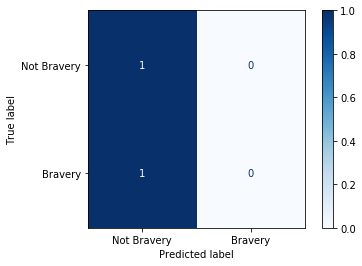

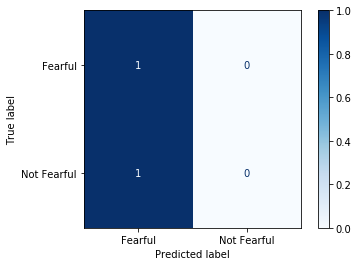

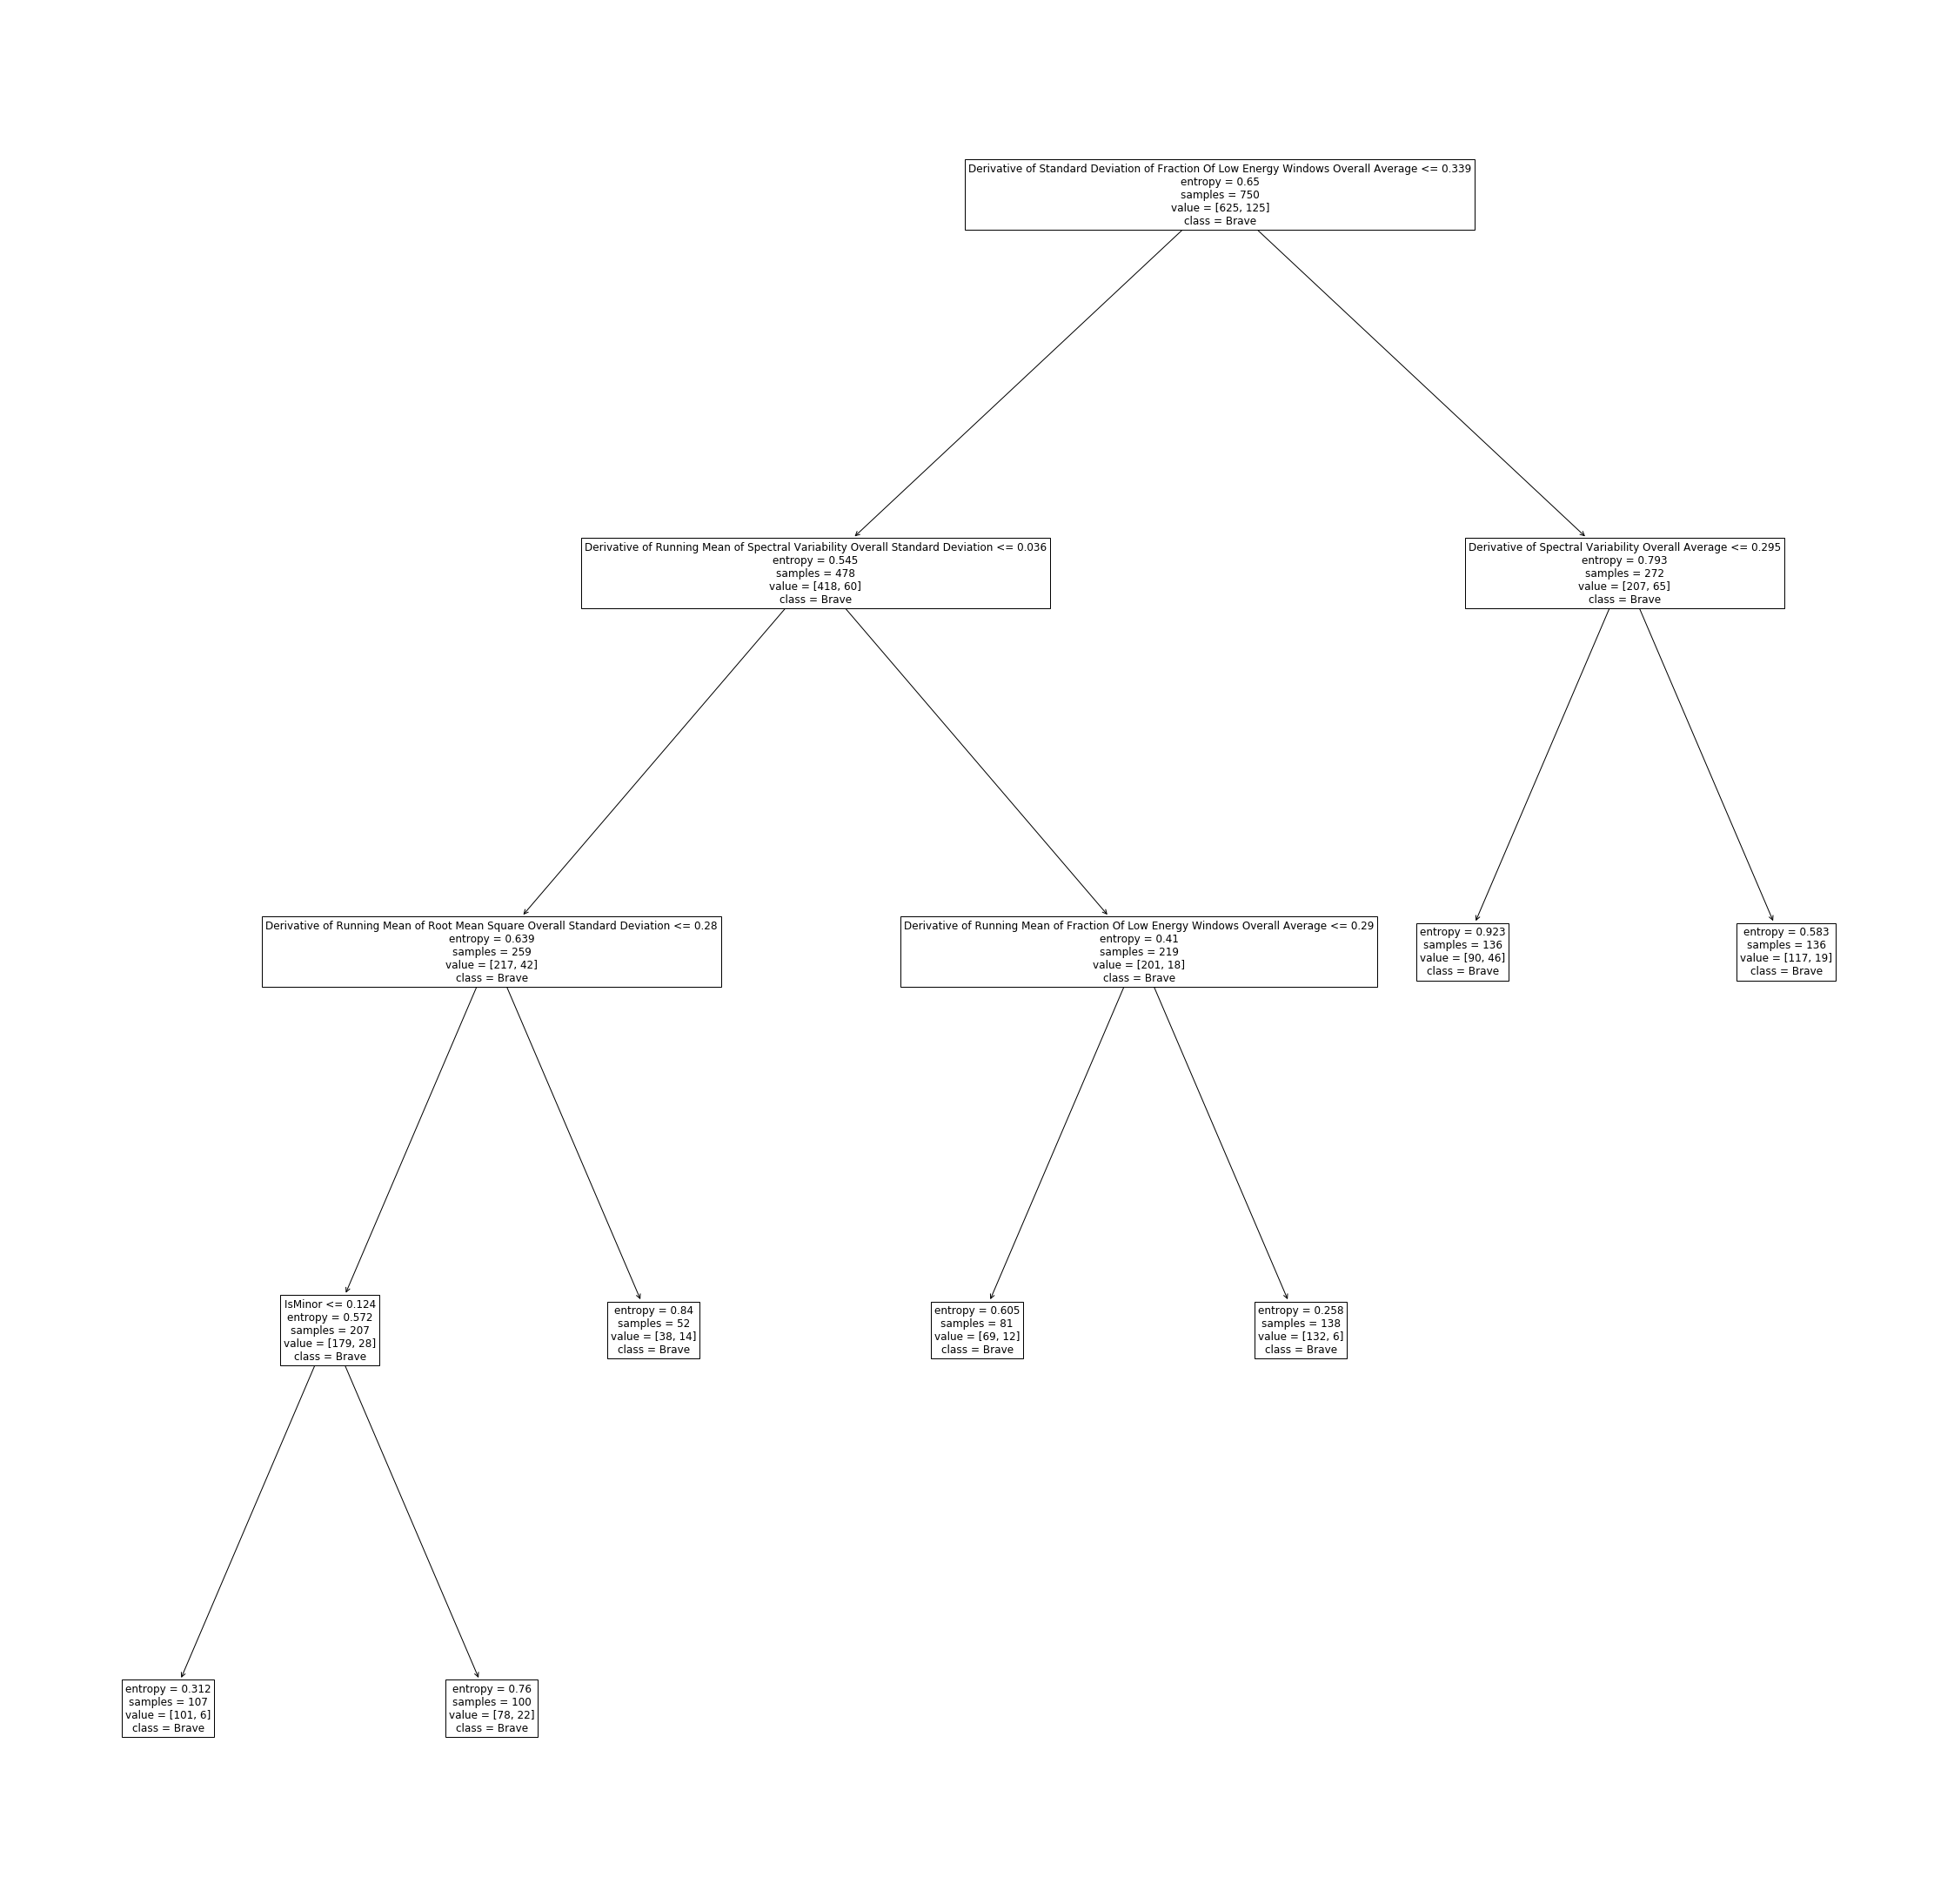

|--- Derivative of Running Mean of LPC Overall Average <= 0.34
|   |--- Derivative of Method of Moments Overall Standard Deviation <= 0.04
|   |   |--- Spectral Rolloff Point Overall Standard Deviation <= 0.28
|   |   |   |--- Derivative of Running Mean of Spectral Variability Overall Standard Deviation <= 0.12
|   |   |   |   |--- class: 0
|   |   |   |--- Derivative of Running Mean of Spectral Variability Overall Standard Deviation >  0.12
|   |   |   |   |--- class: 0
|   |   |--- Spectral Rolloff Point Overall Standard Deviation >  0.28
|   |   |   |--- class: 0
|   |--- Derivative of Method of Moments Overall Standard Deviation >  0.04
|   |   |--- Running Mean of Spectral Flux Overall Standard Deviation <= 0.29
|   |   |   |--- class: 0
|   |   |--- Running Mean of Spectral Flux Overall Standard Deviation >  0.29
|   |   |   |--- class: 0
|--- Derivative of Running Mean of LPC Overall Average >  0.34
|   |--- Derivative of Relative Difference Function Overall Average <= 0.30
|   

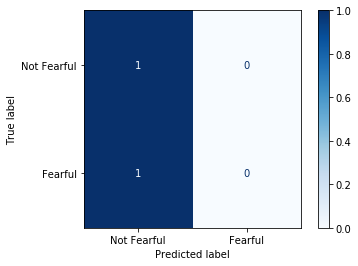

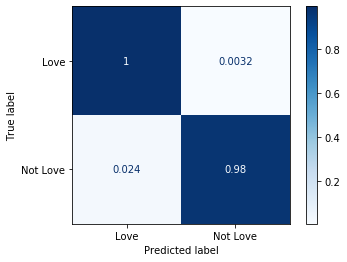

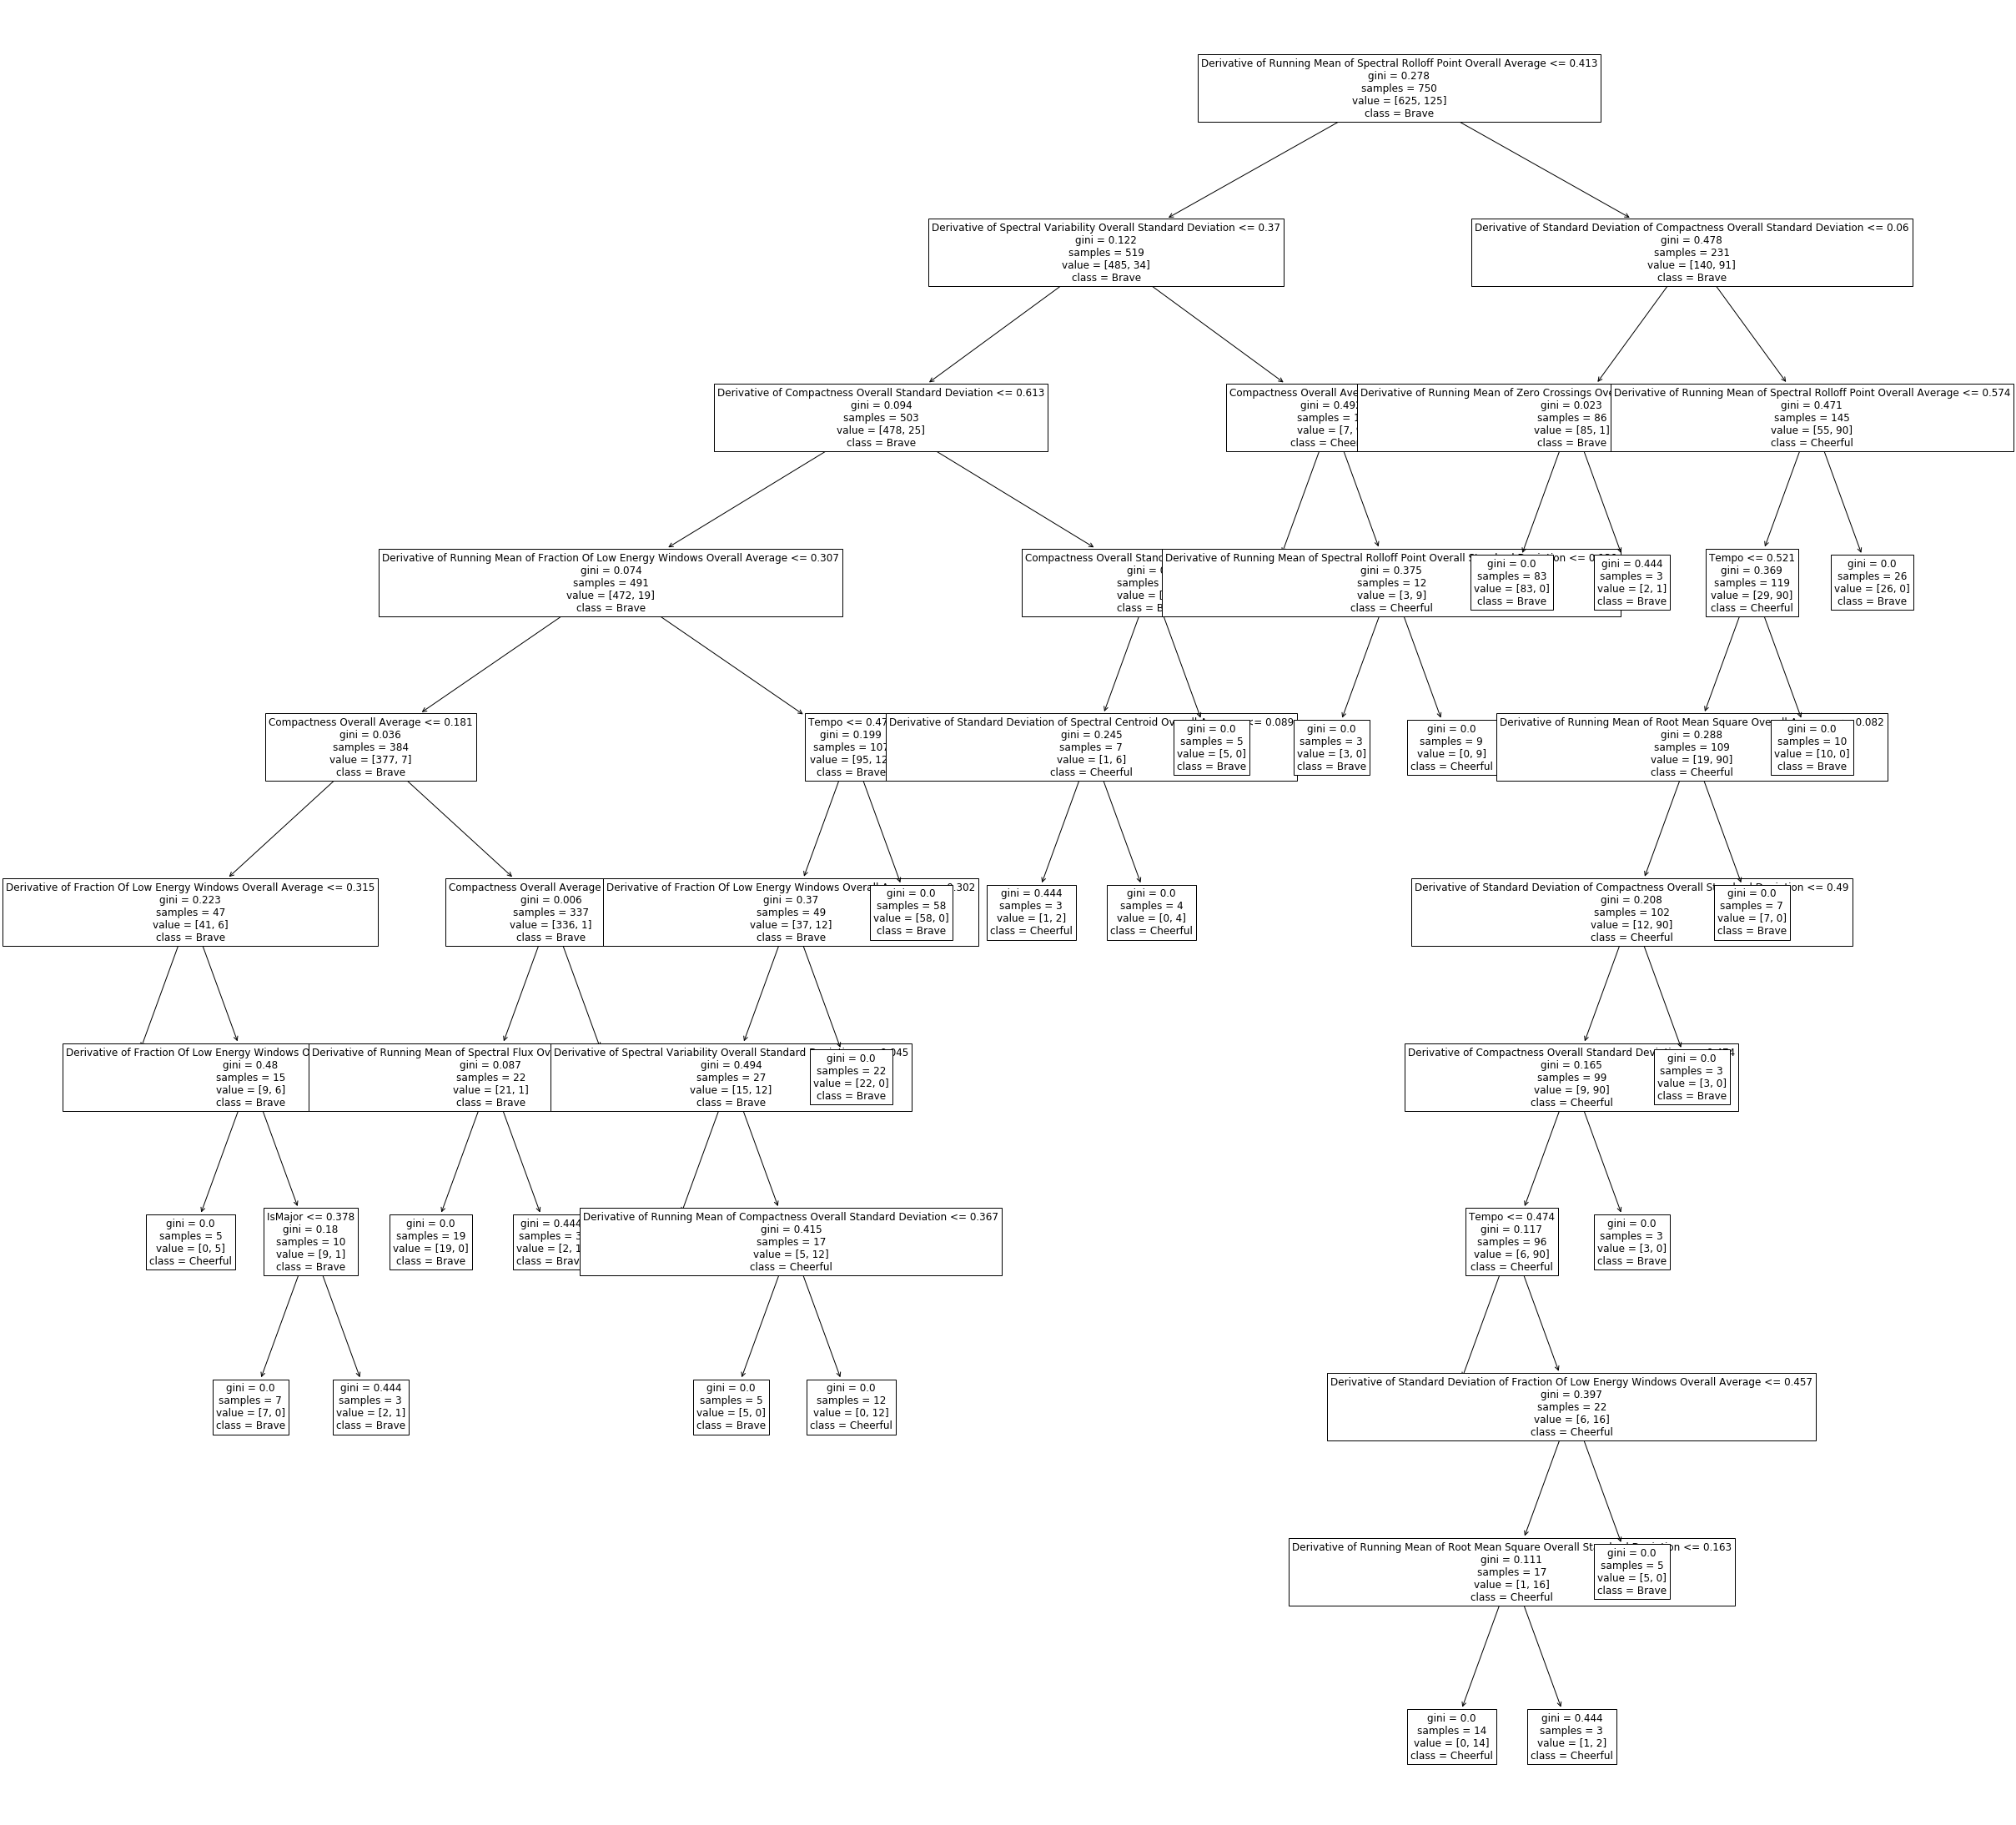

|--- Standard Deviation of Spectral Flux Overall Standard Deviation <= 0.41
|   |--- Derivative of Relative Difference Function Overall Standard Deviation <= 0.37
|   |   |--- Derivative of Standard Deviation of Spectral Flux Overall Average <= 0.61
|   |   |   |--- Running Mean of Spectral Flux Overall Standard Deviation <= 0.31
|   |   |   |   |--- Derivative of Spectral Centroid Overall Standard Deviation <= 0.18
|   |   |   |   |   |--- Derivative of Standard Deviation of Spectral Variability Overall Average <= 0.31
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Derivative of Standard Deviation of Spectral Variability Overall Average >  0.31
|   |   |   |   |   |   |--- Derivative of Standard Deviation of Spectral Variability Overall Average <= 0.33
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Derivative of Standard Deviation of Spectral Variability Overall Average >  0.33
|   |   |   |   |   |   |   |--- Derivative of Running Mean of Spect

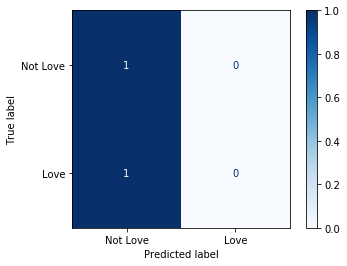

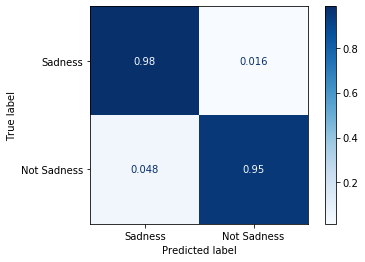

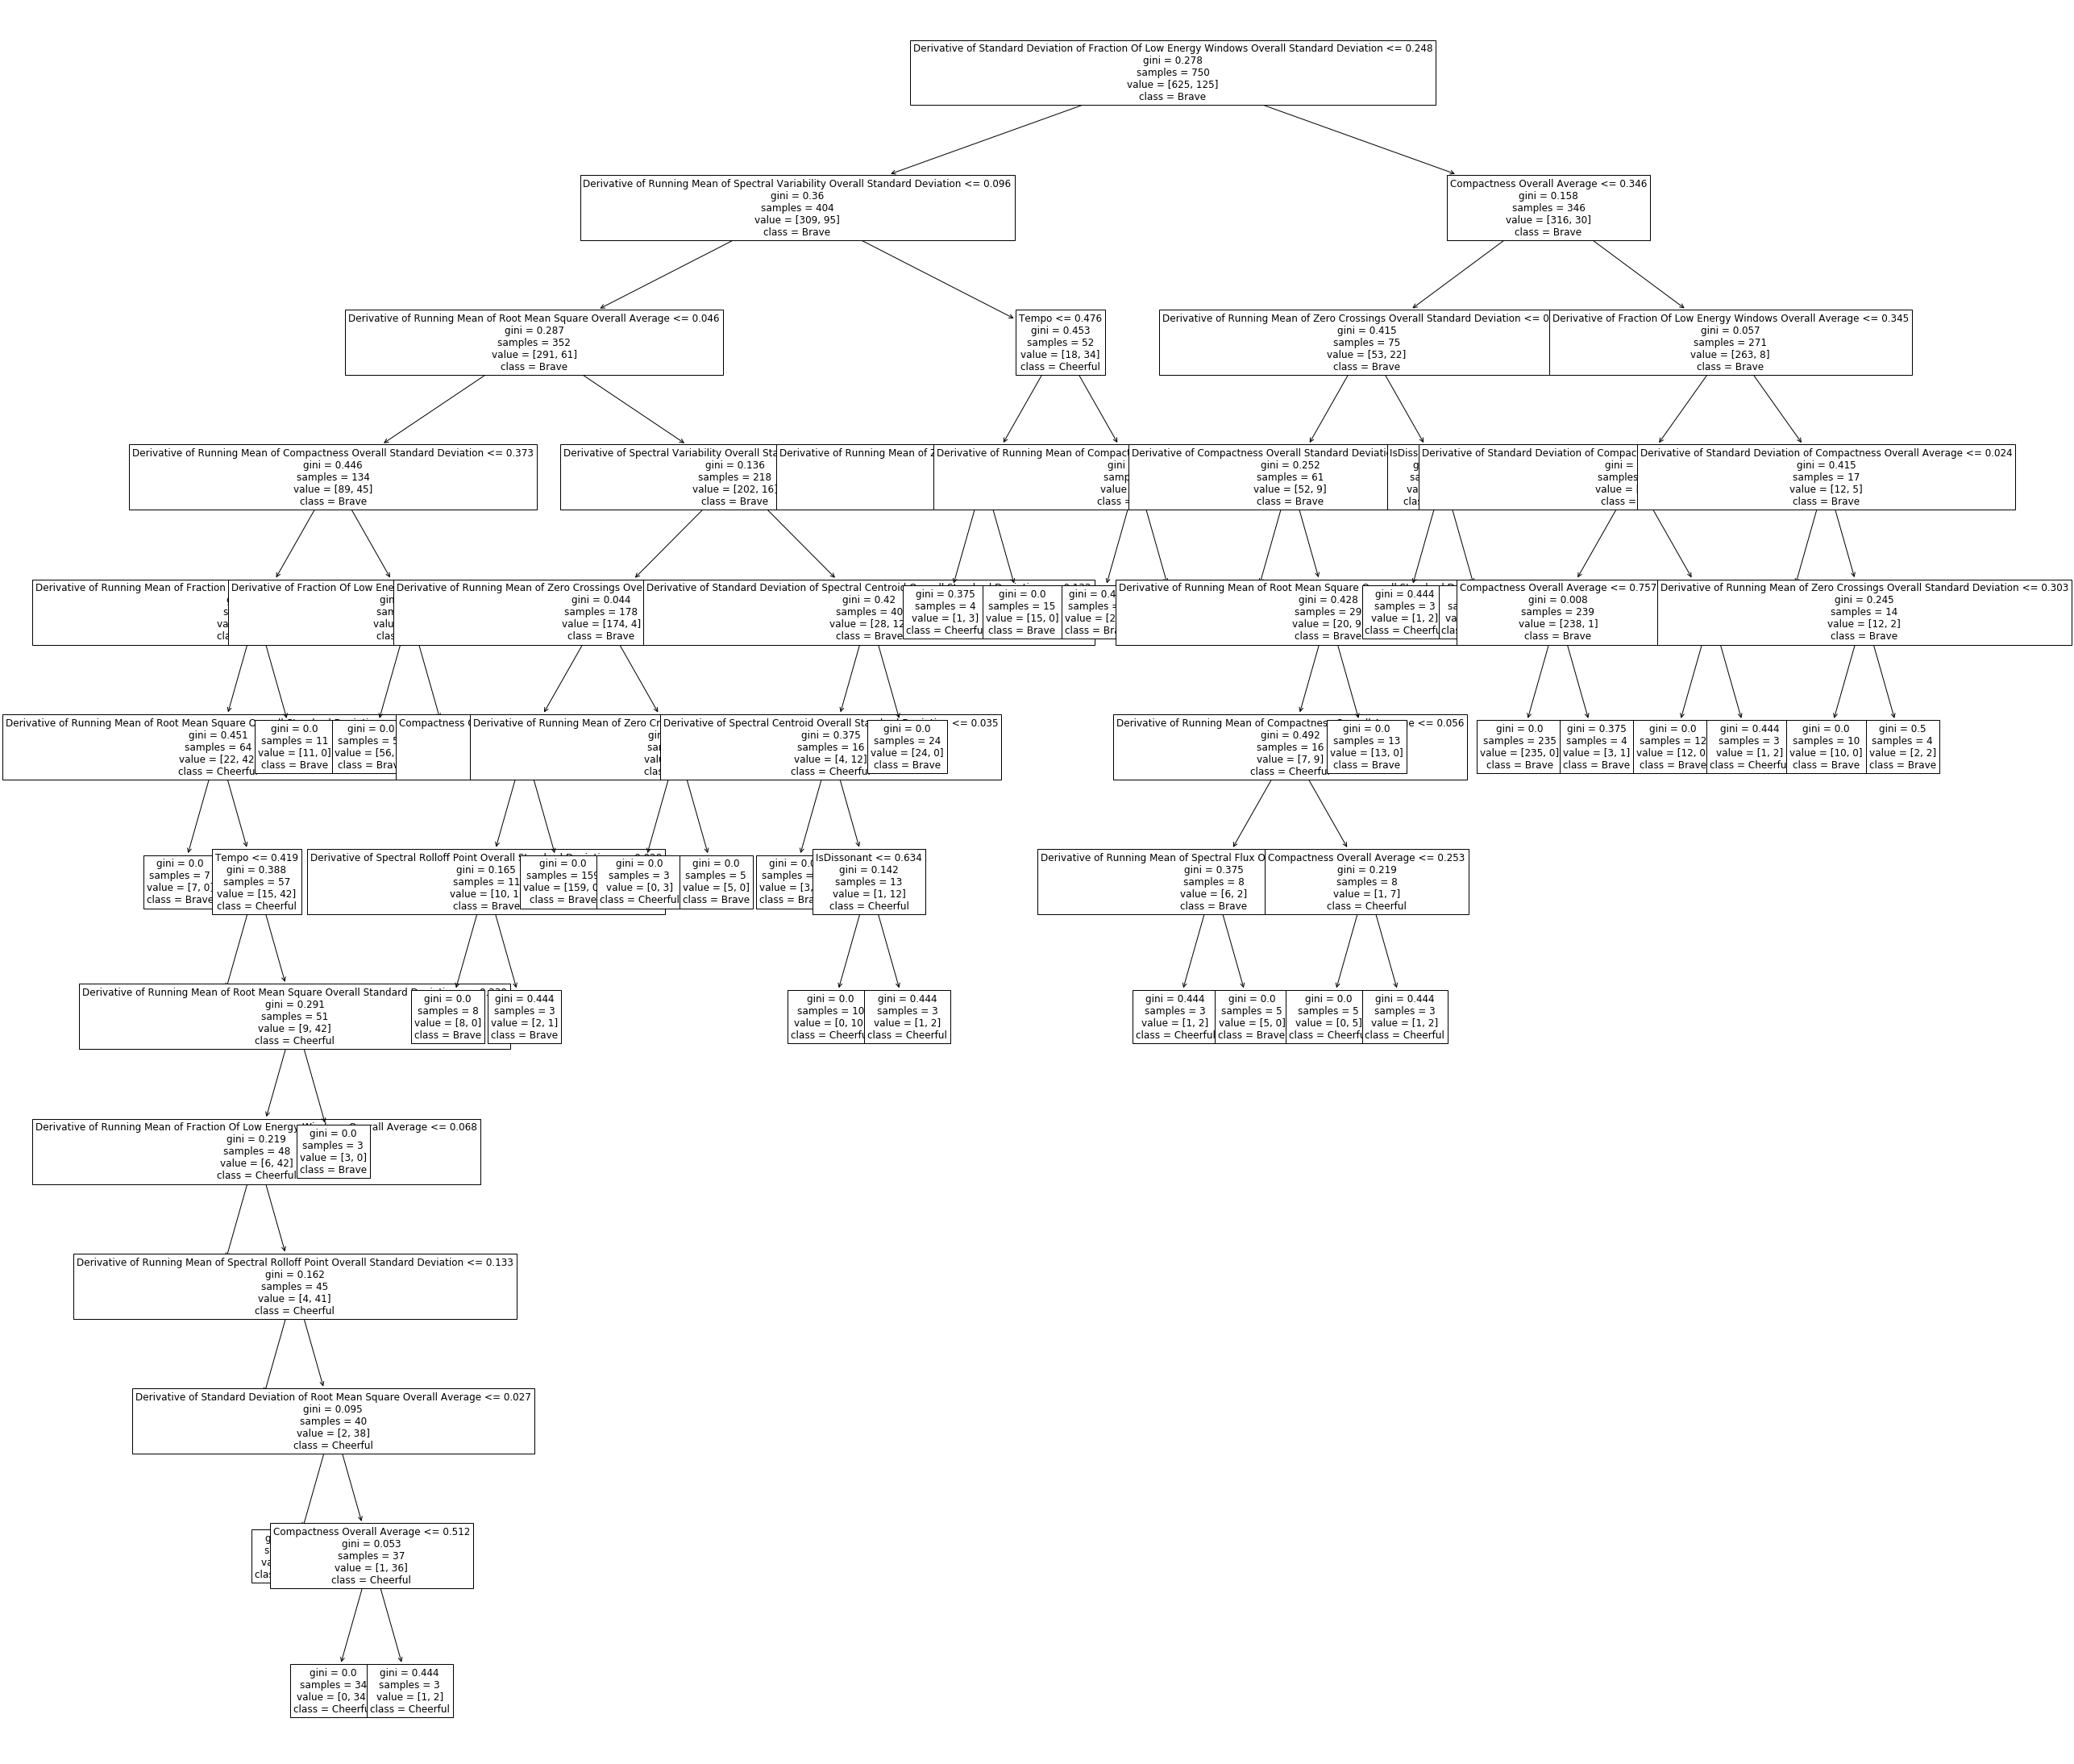

|--- Derivative of Running Mean of LPC Overall Standard Deviation <= 0.25
|   |--- Derivative of Method of Moments Overall Standard Deviation <= 0.10
|   |   |--- Spectral Centroid Overall Average <= 0.05
|   |   |   |--- Running Mean of Spectral Flux Overall Average <= 0.37
|   |   |   |   |--- Running Mean of Spectral Flux Overall Standard Deviation <= 0.34
|   |   |   |   |   |--- Spectral Rolloff Point Overall Standard Deviation <= 0.07
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Spectral Rolloff Point Overall Standard Deviation >  0.07
|   |   |   |   |   |   |--- Derivative of Running Mean of Fraction Of Low Energy Windows Overall Average <= 0.42
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Derivative of Running Mean of Fraction Of Low Energy Windows Overall Average >  0.42
|   |   |   |   |   |   |   |--- Spectral Rolloff Point Overall Standard Deviation <= 0.24
|   |   |   |   |   |   |   |   |--- Running Mean of Spectral Flux Overal

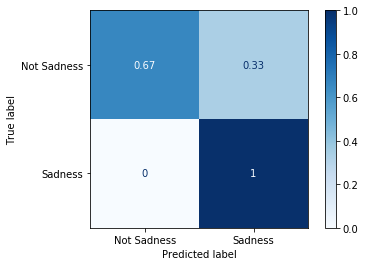

In [8]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],rscv,themes[i])
    disp_tree(rscv.best_estimator_,"FinalTrainingSet.csv")
    disp_rules(rscv.best_estimator_, features)
    test_res("SMOTE",x_val,ovr_val[i],rscv,themes[i])

In [8]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# 38.10% 0.36
feat_sel_2 = SelectFromModel(\
                estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 69) (750,)
(750, 69) (750,)


In [9]:
# Random Forest
random_search_iterations = 1000
n_splits = 5
rand_seed = 108750183

parameters = {
    'n_estimators' : [i for i in range(90,151)],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [i for i in range(1,num_features + 1)],
    'min_samples_split' : uniform(loc=0.01,scale=0.99),
    'min_samples_leaf' : uniform(loc=0.01,scale=0.49),
    'bootstrap' : [True, False],
    'warm_start' : [True, False],
}

# train classifier for SMOTE data
random_forest = RandomForestClassifier(random_state=rand_seed)
random_search_random_forest = \
                        RandomizedSearchCV(random_forest, parameters,\
                                           cv=n_splits, \
                                           random_state=rand_seed, \
                                           n_iter=random_search_iterations,\
                                           n_jobs=-1)

Best Score: 0.6958
Vanilla Train Accuracy: 68.8279%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.8678
Vanilla Train Accuracy: 91.7706%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79

Best Score: 0.8629
Vanilla Train Accuracy: 86.0349%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.7531
Vanilla Train Accuracy: 75.3117%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.9327
Vanilla Train Accuracy: 93.2668%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79



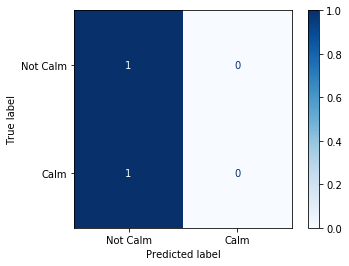

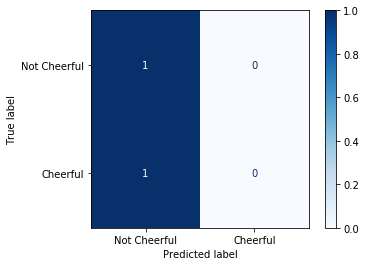

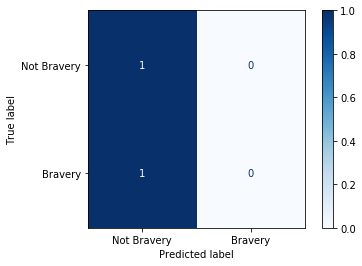

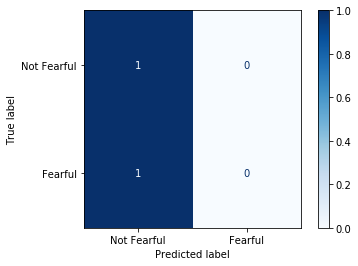

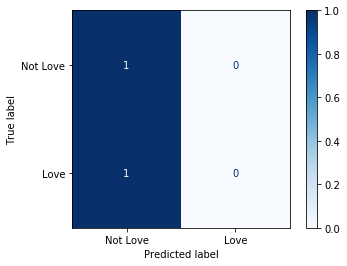

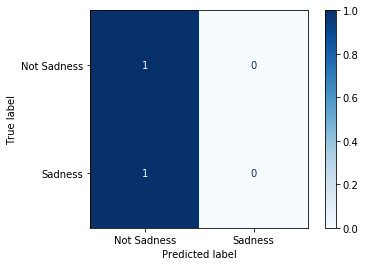

In [10]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_random_forest, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_random_forest, themes[i])

Best Score: 0.8413
Random Oversampling Train Accuracy: 84.8000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.72

Best Score: 0.9493
Random Oversampling Train Accuracy: 98.8000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 85.71%
Random Oversampling F1-score: 0.79

Best Score: 0.9280
Random Oversampling Train Accuracy: 97.6000%
[0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 76.19%
Random Oversampling F1-score: 0.75

Best Score: 0.8387
Random Oversampling Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.72

Best Score: 0.9907
Random Oversampling Train Accuracy: 9

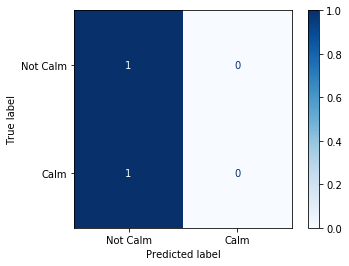

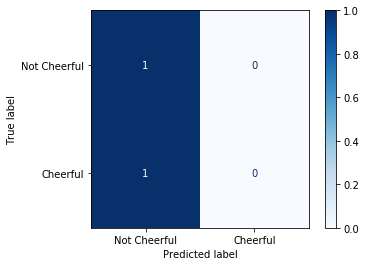

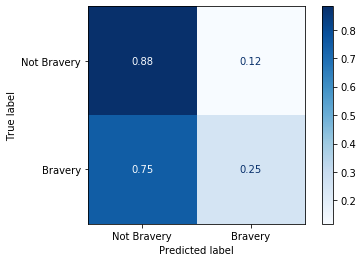

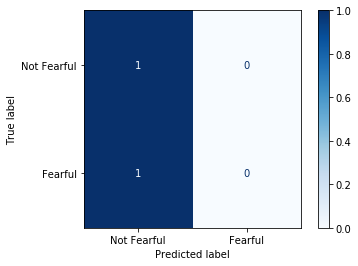

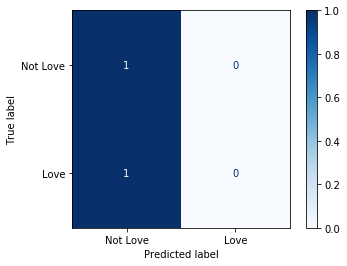

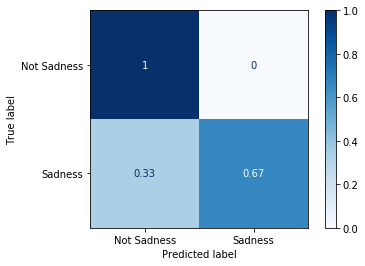

In [11]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_random_forest,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_random_forest,themes[i])

Best Score: 0.8400
bootstrap => False
criterion => gini
max_depth => 43
min_samples_leaf => 0.013296498830860164
min_samples_split => 0.62950233173912
n_estimators => 115
warm_start => True
Splits: 5
SMOTE Train Accuracy: 84.8000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 80.95%
SMOTE F1-score: 0.72

Best Score: 0.9027
bootstrap => False
criterion => entropy
max_depth => 14
min_samples_leaf => 0.013545768219276944
min_samples_split => 0.02246193690011469
n_estimators => 132
warm_start => True
Splits: 5
SMOTE Train Accuracy: 96.9333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 85.71%
SMOTE F1-score: 0.79

Best Score: 0.8800
bootstrap => False
criterion => entropy
max_depth => 14
min_samples_leaf => 0.013545768219276944
min_samples_split => 0.02246193690011469
n_estimators => 132
warm_start => True
Splits: 5
SMOTE Train Accuracy: 96.4000%
[0 0 0 

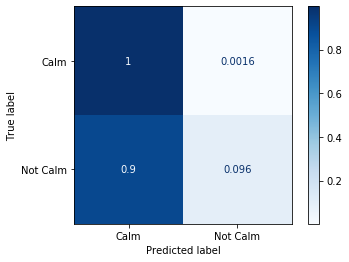

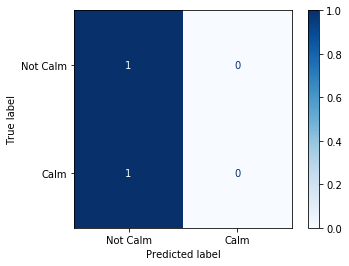

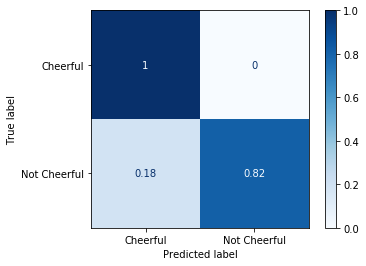

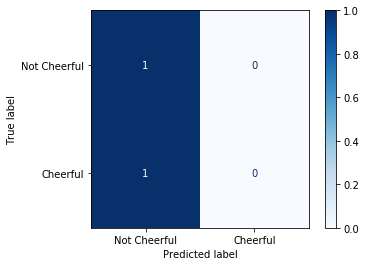

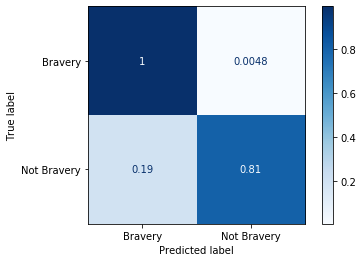

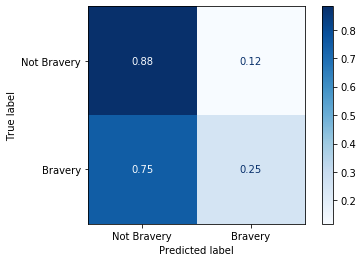

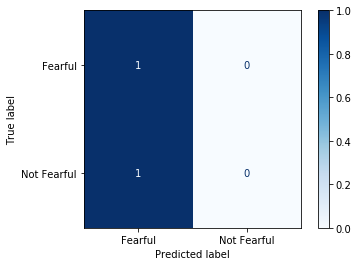

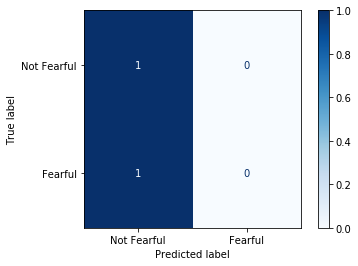

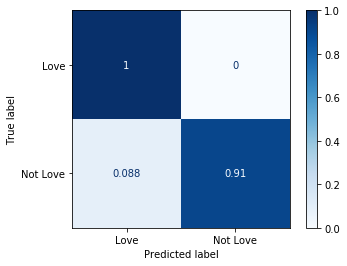

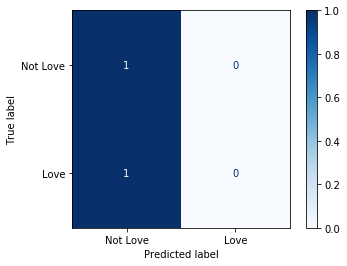

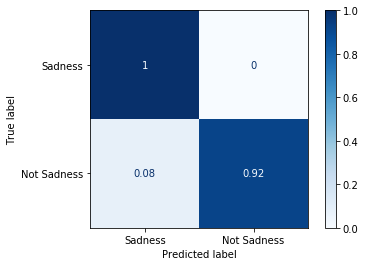

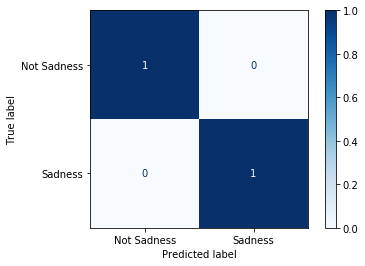

In [12]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_random_forest,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_random_forest,themes[i])